# 1 Introduction



Welcome to Jupyter Notebook, this project was created during the seminar "Advances in Financial Machine Learning" by Prof. Maxim Ulrich at the Chair of Financial Economics and Risk Management at Karlsruhe Institute of Technology (KIT) 2020.

With the use of Deep Learning methods we learn about latent factors and the forecasting of security returns. A technique called Autoencoder helps us to find hidden structures and interactions in the data that are invisible for other financial approaches. 

Our work is based on a [github project by T.Becker, M.Bergerot, P.de Kerdrel, A.Mascia and N.Tachet from columbia university](https://github.com/DLColumbia/DL_forFinance) who offer a code for "Deep Learning for Finance: Deep Portfolios" by Heaton et al (2017). We rework and extend their code for using Autoencoders to replicate and outperform the iShares Nasdaq Biotechnology Index Fund (IBB). 
Our main goals are: 
- Rework their code and make it run;
- Add explanations and make it clear;
- Transform it to TensorFlow2.

# 2 Scope and Theoretical Background

## 2.1 Content and structure

Our analysis is focused on IBB index, that tracks the performance of a market-cap-weighted index of biotechnology and pharmaceutical companies listed on the NASDAQ. The structure of our work is as follows:

We start with a dive into the topic, we present a way to locally execute this notebook and we download and prepare the used data (chapter 3). 
Then we start the modeling in TensorFlow 1. We build an autoencoder reproducing the IBB index and we find the right selections of investments identifying the least and most commonal tickers of the index (chapters 4.1-4.3). 

In the second neural network the relatives shares of the least and most commonal tickers are retrieved to best replicate IBB. Instead of only replicating the index we modify the target curve by adding anti-correlation in periods of large drawdowns in order to outperform this index. If the IBB decreases by more than 6%, the modified benchmark should increase by 6% or more (chapter 4.4). Last step of the modelling is the presentation of the results on tensorboard.(Chapter 4.5)

The whole modeling is analogical done using TensorFlow 2 (KERAS) in chapter 5. 

Lastly, an approach to apply the technique to another index (S&P500) is presented using Quantopian Algorithm, in order to evaluate its performance under real conditions (Chapter 6).

## 2.2 Machine Learning vs. Deep Learning

"Machine Learning is the science (and art) of programming computers so they can
learn from data, and a computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."(Tom Mitchell, 1997)

“If intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake.” (Géron 2019 p.235)

Machine Learning systems can be divided into three categories depending on how much and what kind of supervision they get. These are:
- unsupervised learning,
- Reinforcement Learning
- supervised learning

In unsupervised learning, the alogrithm learns without knowing the true labels of the data. This is similar to learning without a teacher. A typical unsupervised task is clustering, where the algorithm tries to categorize the input by detecting similarities or differences between the data points in the training set. In Reinforcement Learning the learning system is modelled as individual agent, that can observe the environment, select and perform actions and gets rewards or penalties depending on its performance regarding a specific task. It must then learn by itself what is the best strategy to fulfill this specific task. In this notebook we will foucs on the last one of the three, supervised learning, where the training data contains the true labels. The algorithm tries to learn a function that matches the training datapoints to their corresponding true labels. Supervised algorithms are Artificial neural networks (ANNs): "an ANN is a Machine Learning model inspired by the networks of biological neurons found in our brains. ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks."
(adapted and readjusted from Géron 2019 p.8-9,10,279,567)

Regarding our content we use these ANNs to represent the market. 

## 2.3 Clustering vs. Autoencoders

A way to approach our analysis using Machine Learning could be Clustering:"an unsupervised task of dividing the data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them"(Géron 2019 p.236). An application of this technique, written in R, you can see in Becker et al. (2018) where they tried to assess the benefit of using this Deep Learning technqiue by also comparing it to clustering.  

The focus of this work will be on the deep learning technique, called Neural Network, and specifically Autoencoders:"networks capable of learning dense representations of the input data, called latent representations or codings, without any supervision (i.e. the training set is unlabeled). These codings typically have a much lower dimensionality than the input data, making autoencoders useful for dimensionality reduction, especially for visualization purposes. Autoencoders also act as feature detectors, and they can be used for unsupervised pretraining of deep neural networks. Lastly, some autoencoders are generative models: they are capable of randomly generating new data that looks very similar to the training data: simply learn to copy their inputs to their outputs. This may sound like a trivial task, but we will see that constraining the network in various ways can make it rather difficult. For example, you can limit the size of the latent representations, or you can add noise to the inputs and train the network to recover the original inputs. These constraints prevent the autoencoder from trivially copying the inputs directly to the outputs, which forces it to learn efficient ways of representing the data. In short, the codings are byproducts of the autoencoder learning the identity function under some constraints". (Géron 2019 p.567)

In this notebook we use an Autoencoder to learn the latent structure of the market with the restriction of giving it only 5 dimensions to compress and remap an input of over 500 dimensions. 

# 3 Python Setup and Data Preparation

## 3.1 Notebook initialization

We do propaedeutic preparations to be able to execute the code locally. *If you use Colab you can set colab=True and skip 3.1.1 and 3.1.2.*

In [ ]:
colab= True

### 3.1.1 Installation and setting up Python

For local execution we use Anaconda and create a virtual environment. Here we present an instruction on how to set this up. 

1) Download and install [Anaconda](https://www.anaconda.com/products/individual) by following the steps on their website. Also download this notebook and store it in a folder that becomes your working directory. 

2) After installation a virtual environment with the corresponding packages is created. For this open the software "Anaconda Prompt" on your computer and navigate to the current working directory (that is where this notebook is stored). You can navigate by using cd, e.g. to get to directory "Users" on drive C type in the following command (and execute it with enter):  

**cd C:\Users\** &nbsp; &nbsp; &nbsp;_(adjust this code corresponding to your working directory!)_

To get a list of all files in the directory use follwing command:

**dir**

When you see this notebook-file in that list, you are in the right directory.

3) When you reached the corresponding directory, create a new environment called "tensorflow" with following command:  

**conda create -n tensorflow python=3.7.\***  

It is important to set the python version to 3.7.* since TensorFlow2 is not compatible to newer versions (May 2020). Accept incoming queries with enter.

4) Next activate the environment with:  

**conda activate tensorflow**  

After this (TensorFlow) should be shown at the beginning of the line

5) Install the needed packages with: 

**conda install numpy matplotlib pandas scikit-learn tensorflow nb_conda**  

Again accept incoming queries with enter repectively yes. After these packages are installed we also install yfinance package. For this installation we use pip (since conda did not work properly for us):  
**_pip install yfinance --upgrade --no-cache-dir_** 

6) Reopen this notebook with the following command:  

**jupyter notebook**

The Browser should open and after you have selected this notebook, you are ready to go.

### 3.1.2 Second to x time running this notebook

For further local execution you just need the following steps:

1) Open Anaconda Prompt and navigate to working directory

2) Activate environment:

**conda activate tensorflow**

3) Open notebook:
 
**jupyter notebook**

4) Select this notebook

### 3.1.3 Python Libraries import

The following core packages are used in this work:
* [Numpy](https://numpy.org/) provides fundamental functions for scientific work, including methods to handle multidimemsoinal arrays and for linear algebra .
* [Pandas](https://pandas.pydata.org/) offers methods for data science and manipulation.
* [Matplotlib](https://matplotlib.org/) is used for creating different visualizations .
* [Skcikit-learn](https://scikit-learn.org/stable/) (sklearn) is built on top of numpy scipy and matplotlib and provides multiple tools for data science .  
* [Tensorflow](https://www.tensorflow.org/) is used to create a machine learning model and it functions as backend for Keras. This Package provides multiple tools for developing and training machine learning models . Both current (May 2020) available versions are used in this work.
* [Keras](https://keras.io/) offers deep learning methods 
* [Yfinance](https://aroussi.com/post/python-yahoo-finance) was developed to offer a fix for pandas_datareader after Yahoo! Finance decommissioned their historical data API . Instead of using the fix and still relay on the depracted pandas_datareader, as T.Becker et al () did, the independant and faster (based on a runtime test by the authors) download possibility of yfinance is used in this work.

In [ ]:
if colab:
    !pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=1c65577d97b20ed69779b05b21374bfa8563b6890c0dc2763fba01fce36f5ced
  Stored in directory: /tmp/pip-ephem-wheel-cache-5gqnklj7/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
#packages for data manipulation
import numpy as np
import pandas as pd

#package to donwload data
import yfinance as yf

#packages for modelling
import tensorflow.compat.v1 as tfo
import tensorflow as tf
import random as rd
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras import regularizers
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal

#packages for plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 ) # ( 20,6 )
import pydot

#packages for extraction and saving data
import os
import glob as glob
import csv

#packages for date handling
import datetime
from time import time

Using TensorFlow backend.


In [ ]:
#Set seed
seed = 1234
rd.seed(seed)
np.random.seed(seed) # set numpy seed
tf.random.set_seed(seed) # set TF seed

Now the notebook is prepared and we are ready to get started with the data.

## 3.2  Data Preparation

First we need to import and prepare the financial data. Therefore we extract all the names of the tickers, that we want to download and create a folder to store the corresponding data.

### 3.2.1 Create directory for data

First a folder in the current directory is created, in which we store the files with the data for the tickers. The path can be adjusted in datapath.

In [ ]:
datapath=[] #for current path set datapath=[]
if datapath==[]:
    ROOTPATH = os.getcwd()
    datapath = os.path.join(ROOTPATH, 'Data')
    if not os.path.exists(datapath):
        os.makedirs(datapath)

### 3.2.2  Get the names of the tickers

Since we are interested in the tickers of IBB we first need to collect their names. Therefore the file 'IBB_holdings.csv' is accessed. It is important that this file is in the same directory as this notebook or the path is adjusted. It contains the tickers of the IBB with additional information sorted by descending weigths as of 02May2018. Since we are only interested in the names of the tickers, by now, only the first column ,denoted in the code by misleading row[0], is imported and the names are stored in list 'list_tickers'. To get rid off incomplete entries the list is sorted by ascending name order and the last row of the file (contains no entries) is omitted. This is done with <list.pop>. 

*Instead of extracting the tickers from file (as done locally) you could also exract the names from a string. This is show in the appendix.*

In [ ]:
#in colab add this file into your current runtime (Files on the left side bar) 
#by drag&drop or run explicitly_import
tickerFilePath='IBB_holdings.csv'#path to file with the names,
list_import=True
if list_import:
    list_tickers=['ABUS', 'ACAD', 'ACHN', 'ACOR', 'ACRS', 'ADAP', 'ADMS',
                  'ADRO', 'AERI', 'AGIO', 'AIMT', 'AKAO', 'AKBA', 'AKCA',
                  'ALDR', 'ALKS', 'ALNY', 'ALXN', 'AMAG', 'AMGN', 'AMPH',
                  'AMRN', 'ANAB', 'ANIP', 'ARDX', 'ARNA', 'ARRY', 'ARWR',
                  'ASND', 'ATNX', 'ATRA', 'AUPH', 'AVDL', 'AVXS', 'AXON',
                  'BCRX', 'BGNE', 'BIIB', 'BIVV', 'BLCM', 'BLKFDS', 'BLUE',
                  'BMRN', 'BOLD', 'BPMC', 'CALA', 'CARA', 'CASC', 'CBPO',
                  'CCXI', 'CELG', 'CERS', 'CHRS', 'CLDX', 'CLLS', 'CLVS',
                  'CLXT', 'CMRX', 'CNCE', 'COLL', 'CORI', 'CRBP', 'CRIS',
                  'CRSP', 'CRVS', 'CTMX', 'CYTK', 'DBVT', 'DEPO', 'DERM',
                  'DOVA', 'ECYT', 'EDIT', 'EGRX', 'ENDP', 'ENTA', 'EPZM',
                  'ESPR', 'EXEL', 'FGEN', 'FLXN', 'FMI', 'FOLD', 'FOMX',
                  'FPRX', 'GBT', 'GERN', 'GHDX', 'GILD', 'GLPG', 'GLYC',
                  'GRFS', 'GTHX', 'GWPH', 'HALO', 'HZNP', 'ICPT', 'ILMN',
                  'IMGN', 'IMMU', 'INCY', 'INO', 'INSM', 'INSY', 'INVA',
                  'IONS', 'IOVA', 'IRWD', 'ITCI', 'JAZZ', 'JNCE', 'JUNO',
                  'KALA', 'KPTI', 'KURA', 'LGND', 'LMNX', 'LOXO', 'LXRX',
                  'MCRB', 'MDCO', 'MEDP', 'MGNX', 'MNKD', 'MNTA', 'MRNS',
                  'MRSN', 'MYGN', 'MYL', 'MYOK', 'NBIX', 'NBRV', 'NEOS',
                  'NERV', 'NH', 'NK', 'NKTR', 'NLNK', 'NSTG', 'NTLA', 'NVAX',
                  'NVCR', 'OMER', 'ONCE', 'OPK', 'PACB', 'PBYI', 'PCRX', 'PDLI',
                  'PETQ', 'PETX', 'PGNX', 'PRAH', 'PRTA', 'PRTK', 'PTCT',
                  'PTLA', 'QURE', 'RARE', 'RARX', 'RDUS', 'REGN', 'RETA',
                  'RGEN', 'RGNX', 'RIGL', 'RTRX', 'RVNC', 'SAGE', 'SBBP',
                  'SCMP', 'SGEN', 'SGMO', 'SGYP', 'SHPG', 'SNDX', 'SNNA',
                  'SPPI', 'SRPT', 'SUPN', 'SVRA', 'SYNH', 'TBPH', 'TECH',
                  'TLGT', 'TOCA', 'TSRO', 'TTPH', 'TXMD', 'USD', 'UTHR',
                  'VCYT', 'VNDA', 'VRTX', 'VTL', 'VYGR', 'XLRN', 'XNCR', 'ZGNX']
else:
    #create list of the tickers from tickerFilePath
    with open(tickerFilePath, 'r',encoding='mac_roman') as csvfile:
            file = csv.reader(csvfile, delimiter=' ')
            c=0
            list_tickers=[]
            for row in file:
                if c >= 11:
                    list_tickers.append(row[0].split(',')[0])
                c+=1
    list_tickers.sort()
    #data cleaning
    list_tickers.pop()

### 3.2.3  Download and store the data from yahoo

Now that we have the names of tickers, we are looking for their financial data. Especially we want to fetch the adjusted close prices. They represent the value of each ticker over time. For this a download function is defined, that uses the package yfinance to download data from [Yahoo!Finance](https://finance.yahoo.com/). This website offers free data about stock prices, rates and market information.  
_Note: If you already have the financial data in the folder specified by datapath, set <download=False> to skip the (re-)download._

In [ ]:
download= True #download=False

In [ ]:
def download_data(symbols,start_date, end_date):
    '''
    This function downloads finance data from yahoo with yfinance corresponding to the tickers in symbols in the given time interval.
    It returns the data in a list as one dataframe per ticker and also returns the missing tickers.
    Args:
    symbols (list): strings containing names of tickers/benchmarks
    start_date (datetime): start date of time intervall 
    end_date (datetime): end date of time intervall
    Returns:
    list_df (list): dataframes with data of the tickers/benchmarks
    missing_symbols (list): strings containing names of tickers, that were not able to be downloaded
    '''
    nb_symbols=len(symbols)
    list_df=[None]*(nb_symbols)
    missing=[]
    missing_symbols=[]
    for i in range (nb_symbols):
        print(symbols[i]+" download in progress ("+str(i+1)+"/"+str(nb_symbols)+") ... Please Wait!")
        list_df[i] = yf.download(symbols[i], start_date ,end_date)
        if (list_df[i].empty):
            print(symbols[i]+": ticker will be removed from list, no data available")
            missing_symbols.append(symbols[i])
            missing.append(i)
    missing.reverse()
    for element in missing:#remove tickers with no data
            del list_df[element:element+1]
    print("download complete")
    return list_df, missing_symbols

Restrictions to the download time intervall and the number of tickers are set. To compare our results with the ones of Becker et al. (2018), we take the same period by default.

In [ ]:
# Specifying the time interval for download
start_date = '2015-05-05'# , no data for weekends and public holidays
end_date = '2018-01-01'

# adjusting dates for downloads, since start and end of the downloads are one day earlier
start_date= (datetime.datetime.strptime(start_date,'%Y-%m-%d')).isoformat()[0:10] 
end_date = (datetime.datetime.strptime(end_date,'%Y-%m-%d')).isoformat()[0:10]

# #restrict the number of tickers (optional)
# nb_tickers = 1
# list_tickers=list_tickers[0:nb_tickers]

The corresponding financial data to the tickers is downloaded from Yahoo! Finance by executing the former defined function. This step may take a while.

In [ ]:
#get the data from Yahoo.
if download:
    list_tickers_data, tickers_miss=download_data(list_tickers,start_date, end_date)
    list_tickers=[e for e in list_tickers if e not in tickers_miss]
    print("Failed downloads: "+str(tickers_miss))

ABUS download in progress (1/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ACAD download in progress (2/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ACHN download in progress (3/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACHN: No data found, symbol may be delisted
ACHN: ticker will be removed from list, no data available
ACOR download in progress (4/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ACRS download in progress (5/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ADAP download in progress (6/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ADMS download in progress (7/199) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
ADRO download in progress (8/199) ..

The downloaded data is exported to csv and stored in the folder 'Data' in the specified path.

In [ ]:
if download:
    #export to csv and store
    if colab:
        nb_tickers=len(list_tickers_data)
        for i in range (nb_tickers ):  
            csv_file = datapath + '/' + 'csv_' + list_tickers[i] + '_from_' + str(list_tickers_data[i].index[0])[0:10] + '_to_' + str(list_tickers_data[i].index[-1])[0:10] + ".csv"
            list_tickers_data[i].to_csv(csv_file , sep=',')
    else:
        nb_tickers=len(list_tickers_data)
        for i in range (nb_tickers ):  
            csv_file = datapath + '\\' + 'csv_' + list_tickers[i] + '_from_' + str(list_tickers_data[i].index[0])[0:10] + '_to_' + str(list_tickers_data[i].index[-1])[0:10] + ".csv"
            list_tickers_data[i].to_csv(csv_file , sep=',')

As benchmarks the IBB itself and the iShares Nasdaq Biotechnology ETF(^NBI) are used. The process to download and store these is analogical to previous steps.

In [ ]:
if download:
    #determine benchmarks
    bsymbols='IBB, ^NBI'

    #download benchmarks and store the dataframes in a list
    bsymbols=bsymbols.replace(" ","")
    list_bench=bsymbols.split(',')
    list_bench_data, bench_miss= download_data(list_bench,start_date, end_date)
    list_bench=[e for e in list_bench if e not in bench_miss]

IBB download in progress (1/2) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
^NBI download in progress (2/2) ... Please Wait!
[*********************100%***********************]  1 of 1 completed
download complete


In [ ]:
if download:
    #export benchmarks to csv and store them
    if colab:
        nb_bench=len(list_bench_data) 
        for i in range (nb_bench ):
            csv_file = datapath + '/' +'csv_'+list_bench[i] + '_from_' + str(list_bench_data[i].index[0])[0:10] + '_to_' + str(list_bench_data[i].index[-1])[0:10] +'_benchmark'+str(i+1)+ ".csv"
            list_bench_data[i].to_csv(csv_file , sep=',')
    else:
        nb_bench=len(list_bench_data) 
        for i in range (nb_bench ):
            csv_file = datapath + '\\' +'csv_'+list_bench[i] + '_from_' + str(list_bench_data[i].index[0])[0:10] + '_to_' + str(list_bench_data[i].index[-1])[0:10] +'_benchmark'+str(i+1)+ ".csv"
            list_bench_data[i].to_csv(csv_file , sep=',')

### 3.2.4 Import of the CSV files for visualization

The locally stored CSV-files are extracted and saved as dataframes to use them for the visualization.   
_Note: If all prior steps (including downloads) have been exectued in this session, the files are already imported. For further sessions, however, it is no longer necassary to download the files again and the download step can then be replaced with this import step by setting <download=false> in 3.2.3._

In [ ]:
def csv_to_df(path):
    '''
    extracts all the local tickers and benchmarks, stored in path as csv-files, to dataframes
    Args:
    path (string): path to csv-files
    Returns:
    list_tickerdata (list): dataframes of tickers
    list_tickernames (list): names (str) of the tickers
    list_benchmarkdata (list): dataframes of benchmarks
    list_benchmarknames (list): names (str) of benchmarks
    '''
    list_tickerdata=[] 
    list_benchmarkdata=[]
    list_tickernames=[]
    list_benchmarknames=[]
    df_ror=[]
    allFiles = glob.glob(path + "/csv" + "*.csv") #search for the files
    for file_ in allFiles:
        with open(file_, 'r', encoding ='mac_roman') as csvfile:
            if not "benchmark" in file_ :
                df = pd.read_csv(csvfile, index_col=0, header=0)
                list_tickerdata.append(df)
                list_tickernames.append(file_.split('_')[1])
            else:
                benchmark_temp = pd.read_csv(csvfile, index_col=0, header=0)
                list_benchmarkdata.append(benchmark_temp)
                list_benchmarknames.append(file_.split('_')[1])
    return list_tickerdata, list_tickernames, list_benchmarkdata, list_benchmarknames

In [ ]:
#run extraction function 
list_tickers_data=[]
list_bench_data=[]
list_tickers=[]
list_bench=[]
list_tickers_data, list_tickers, list_bench_data, list_bench = csv_to_df(datapath)

### 3.2.5 Visualizations of the data

Multiple plots are generated to visualize the downloaded data. The first plot presents the rates of return of the tickers. This plot might be adjusted depending on the number of tickers, since all rates are plotted into one plot.

In [ ]:
#extract ror and adjusted-close-prices of the tickers
nb_tickers=len(list_tickers_data)
df_ror=[None]*nb_tickers
df_adjc=[None]*nb_tickers
for i in range (nb_tickers):
    df_ror[i] = list_tickers_data[i]['High'].pct_change()
    df_adjc[i]= list_tickers_data[i]['Adj Close']

<function matplotlib.pyplot.show>

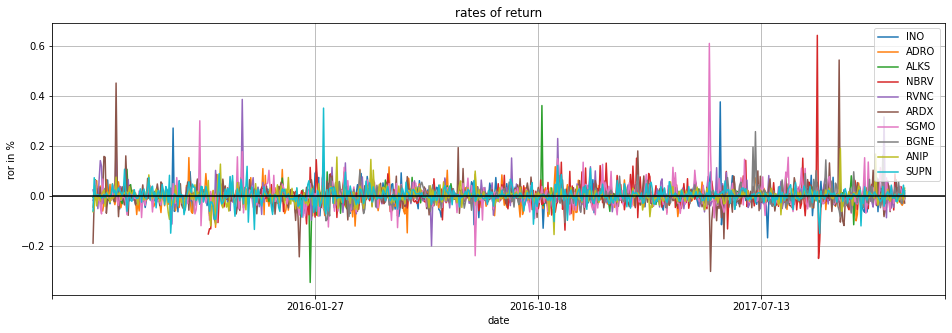

In [ ]:
#plot ror
num_rates=10#number of plotted rates
matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 5 )
fig, ax = plt.subplots()
nb_plot=nb_tickers
if nb_plot>num_rates:
    nb_plot=num_rates
for i in range (nb_plot):    
    ax.plot(df_ror[i],'C'+str(i), label=list_tickers[i])    
ax.set_title("rates of return")
ax.set_ylabel("ror in %")
ax.set_xlabel("date")
xmin, xmax, ymin, ymax = ax.axis()
ax.set_xticks([xmin,(xmax-xmin)/4,(xmax-xmin)/2,3*(xmax-xmin)/4,xmax])
ax.legend(loc="upper right", frameon=True)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
plt.show

The next plots show the adjusted closing prices of the tickers. The number of generated plots can be changed

<function matplotlib.pyplot.show>

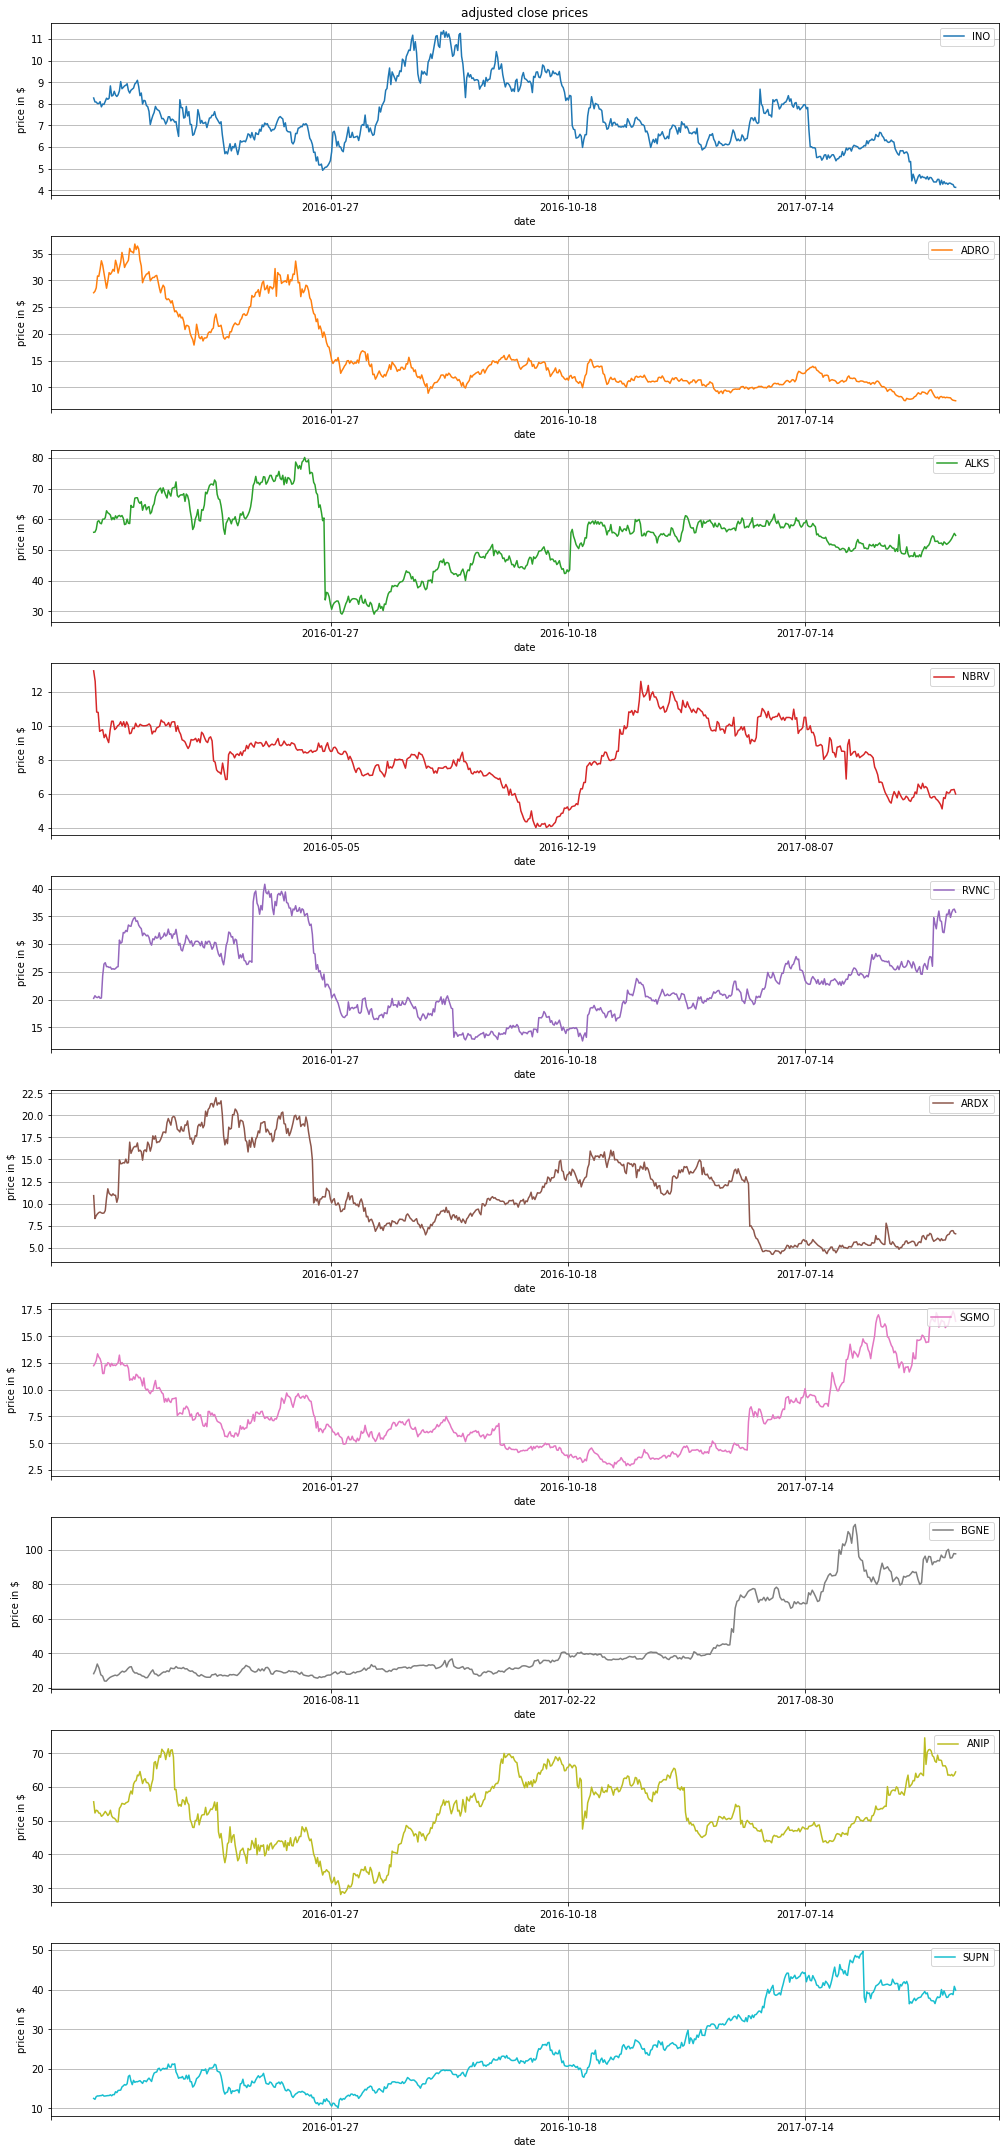

In [ ]:
#plot adjC
num_plots=10#to show all plots: num_plots=nb_tickers
matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 3*num_plots )
fig, axes =plt.subplots(nrows=num_plots)
for i, ax in enumerate(axes.flat):
    ax.plot(df_adjc[i],'C'+str(i), label=list_tickers[i])    
    ax.set_ylabel("price in $")
    ax.set_xlabel("date")
    ax.legend(loc="upper right", frameon=True)
    if i==0:
        ax.set_title("adjusted close prices")
    xmin, xmax, ymin, ymax = ax.axis()
    ax.set_xticks([xmin,(xmax-xmin)/4,(xmax-xmin)/2,3*(xmax-xmin)/4,xmax])
    ax.grid(True, which='both')
plt.subplots_adjust(wspace=0.4)
fig.tight_layout(pad=1)
plt.show

Next the rates of return of the benchmarks are plotted. 

<function matplotlib.pyplot.show>

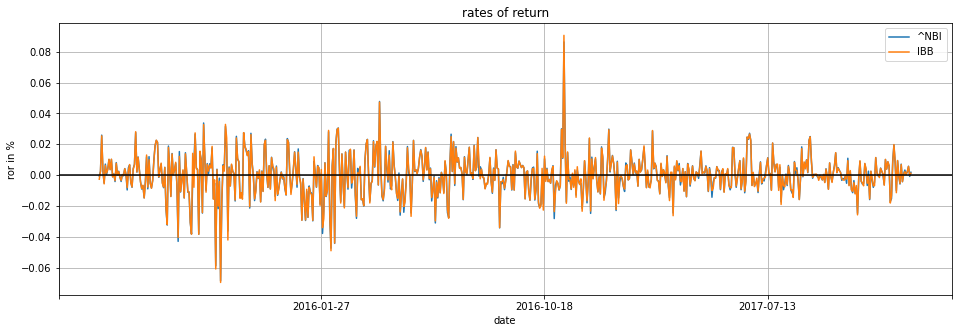

In [ ]:
#extract ror and adjC of the benchmarks
nb_bench=len(list_bench_data)
df_rorb=[None]*nb_bench
df_adjcb=[None]*nb_bench
for i in range (nb_bench):
    df_rorb[i] = list_bench_data[i]['High'].pct_change()
    df_adjcb[i]= list_bench_data[i]['Adj Close']    
#plot ror
matplotlib.rcParams['figure.figsize'] = ( 16, 5 )
fig, ax = plt.subplots()
for i in range (nb_bench):    
    ax.plot(df_rorb[i],'C'+str(i), label=list_bench[i])    
xmin, xmax, ymin, ymax = ax.axis()
ax.set_xticks([xmin,(xmax-xmin)/4,(xmax-xmin)/2,3*(xmax-xmin)/4,xmax])
ax.set_title("rates of return")
ax.set_ylabel("ror in %")
ax.set_xlabel("date")
ax.legend(loc="upper right", frameon=True)
ax.axhline(y=0, color='k')
ax.grid(True, which='both')
plt.show

Last the adjusted closing prices of the benchmarks are shown.

<function matplotlib.pyplot.show>

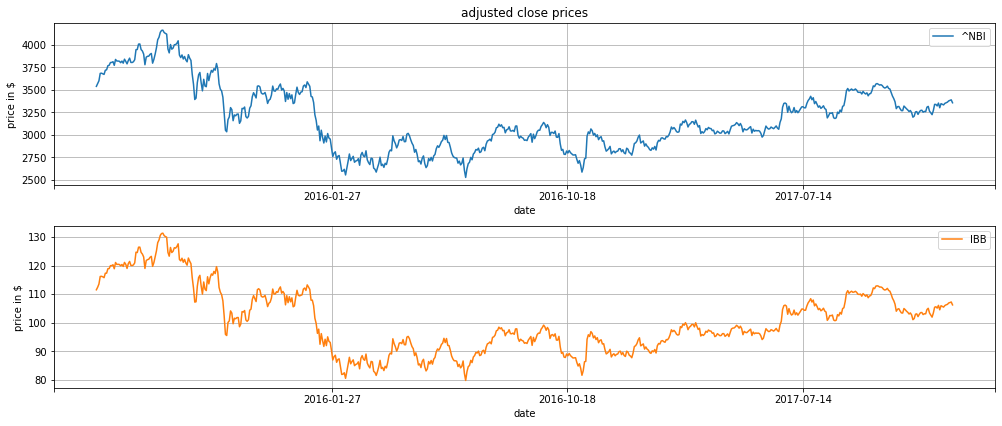

In [ ]:
#plot adjC of the benchmarks
matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 3*nb_bench )
fig, axes =plt.subplots(nrows=nb_bench)
for i, ax in enumerate(axes.flat):
    ax.plot(df_adjcb[i],'C'+str(i), label=list_bench[i])    
    ax.set_ylabel("price in $")
    ax.set_xlabel("date")
    ax.legend(loc="upper right", frameon=True)
    ax.grid(True, which='both')
    if i==0:
        ax.set_title("adjusted close prices")  
    xmin, xmax, ymin, ymax = ax.axis()
    ax.set_xticks([xmin,(xmax-xmin)/4,(xmax-xmin)/2,3*(xmax-xmin)/4,xmax])
plt.subplots_adjust(wspace=0.4)
fig.tight_layout(pad=1)
plt.show

### 3.2.6 Import and normalization of data for modelling

For modelling the adjusted close prices are extracted from the locally stored CSV-files and saved as a dataframe to use them for the modelling. This dataframe is normalized with MinMaxScaler from package sk-learn to transform the values to range of 0 to 1. In contrast to the get_data function from Becker et al. (2018), the extract_data function was adjusted to import the data by specifying start and end date while also running without explicitly setting a daterule. However it fetches the dates from the first dataframe with data in the corresponding time intervall and it is therefore necessary that this first dataframe does not contain any missings in the corresponding period.

In [ ]:
def extract_data(path, start, end, var):
    '''
    Format a Dataframe from a csv file with the values of a specific variable for all tickers (columns) during the concerned date range (rows).
    
    Args:
    path (str): path to the CSV file
    start (datetime): first day of the time range
    end (datetime): last day of the time range
    var (str): name of the examined variable (e.g. adjacent close prices)
    
    Returns:
    df_out (dataframe): dataframe with the data to the given variable
    '''
    list_df=[]
    list_tickers=[]
    dates=[]
    allFiles = glob.glob(path+"/*.csv")
    for file_ in allFiles:
        with open(file_, 'r', encoding ='mac_roman') as csvfile:
            if not 'benchmark' in file_:# ignore the benchmarks here. (Imported in Calibration)
                import_df = pd.read_csv(csvfile, header=0)
                import_df["Date"]=pd.to_datetime(import_df.Date,format="%Y-%m-%d")
                dstart=import_df.iloc[0,import_df.columns.get_loc("Date")]
                dend=import_df.iloc[-1,import_df.columns.get_loc("Date")]
                if (dstart > start) | (dend < end): #ignore ticker if data does not contain the time intervall
                    continue
                if(len(dates)==0):#first dataframe must not contain missings!
                    dates = import_df['Date']
                    dates=dates[(dates>=start)&(dates<=end)]
                    dates= dates.values        
                import_df=import_df[(import_df['Date']>=start)&(import_df['Date']<=end)]
                if (len(dates)!=len(import_df)): # ignore ticker if data contains nan
                    continue
                
                var_arr = import_df[var].values
                ticker = file_.split('_')[1]
                #dend=datetime.datetime.strptime(import_df.iloc[-1,0],"%Y-%m-%d")
                list_df=list_df+list(var_arr)
                list_tickers.append(ticker)
            
    # Reshape our list to an array with the right shape, ready to be fitted in a dataframe    
    list_df = np.reshape(list_df, [len(list_tickers), len(dates)]).T
    df_out = pd.DataFrame(list_df, index=dates, columns=list_tickers)
    
    return df_out

In [ ]:
def normalize_data(df):
    '''
    Use the preprocessing object MinMaxScaler from sklearn library to normalize the data.
    The out dataframe has the same indexes and columns.
    
    Args:
    df (dataframe): original dataframe
    
    Returns:
    df_n (dataframe): normalized dataframe 
    '''
    x = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_n = pd.DataFrame(x_scaled, index=df.index, columns=df.columns)
    return df_n

Two dataframes are created:
- **DF_adj_close**:   Dataframe with the adjusted close prices
- **DF_adj_close_n**: Dataframe with the normalized data

Further data extracted:
- list of tickers
- dates

In [ ]:
# Specifying the time interval for model data
model_start_date = "2015-05-06"
model_end_date = "2017-12-29"

#dates conversion
start=datetime.datetime.strptime(model_start_date,"%Y-%m-%d")
end=datetime.datetime.strptime(model_end_date,"%Y-%m-%d")

#adjusted close prieces dataframe
DF_adj_close = extract_data(datapath,start,end,'Adj Close')
print('dataframe (excerpt):')
display(DF_adj_close)
print('\n')

#normalized dataframe
DF_adj_close_n = normalize_data(DF_adj_close)
print('normalized dataframe (excerpt):')
display(DF_adj_close_n)

#further data
list_tickers = DF_adj_close.columns.values
dates = DF_adj_close.index.values

dataframe (excerpt):


,INO,ADRO,ALKS,RVNC,ARDX,SGMO,ANIP,SUPN,OMER,ASND,BIIB,ILMN,AGIO,FPRX,GWPH,NBIX,VNDA,RARE,SHPG,JUNO,AMRN,JAZZ,DBVT,FOMX,ZGNX,AUPH,LXRX,ALXN,CYTK,CNCE,CARA,PBYI,RIGL,ALNY,ABUS,USD,UTHR,ENTA,HZNP,PDLI,...,OPK,ECYT,MYL,AMGN,QURE,MGNX,CALA,IONS,NSTG,SAGE,AVDL,CRBP,NVAX,CLVS,HALO,SPPI,ADAP,PRAH,CORI,EXEL,XNCR,PTLA,IMMU,CLLS,BLCM,ATRA,MYGN,ESPR,PACB,FOLD,FLXN,GERN,MNKD,LGND,ARNA,RTRX,CHRS,INSM,BMRN,BCRX
2015-05-06,8.09,27.990000,55.799999,20.700001,8.32,12.440000,52.279999,12.310000,21.450001,16.170000,383.559998,188.550003,96.139999,21.340000,108.790001,36.660000,9.31,64.500000,237.000000,44.009998,1.97,174.899994,25.540001,10.31,11.120000,3.65,7.21,155.009995,5.70,14.760000,10.04,185.610001,4.18,105.709999,14.42,13.873879,168.020004,35.349998,28.530001,5.763031,...,14.00,5.74,71.050003,138.049713,27.559999,27.850000,9.02,60.369999,11.99,55.160000,14.48,3.620,157.600006,79.910004,15.180000,5.940000,16.000000,29.000000,9.32,2.950000,13.960000,37.490002,3.71,31.100000,233.600006,38.029999,33.669998,100.870003,5.98,10.60,19.990000,3.89,20.799999,78.449997,41.299999,22.000000,21.950001,21.100000,119.699997,9.47
2015-05-07,8.08,28.620001,56.730000,20.420000,8.66,12.730000,53.099998,13.000000,21.209999,16.139999,383.290009,190.820007,99.129997,21.450001,110.120003,37.430000,9.74,61.900002,239.600006,44.439999,1.98,176.949997,25.379999,10.76,11.200000,3.75,7.00,162.960007,5.99,14.760000,10.03,190.580002,4.03,106.629997,13.87,14.183392,172.679993,33.720001,29.389999,5.807294,...,14.14,5.77,70.389999,137.137756,28.330000,29.740000,9.52,60.430000,12.25,54.860001,14.71,3.454,157.800003,78.489998,15.160000,5.890000,17.230000,28.860001,9.99,3.110000,14.210000,37.130001,3.80,31.549999,234.699997,36.669998,32.660000,99.980003,5.97,10.54,20.090000,3.91,20.100000,79.000000,41.500000,22.459999,21.440001,21.700001,120.360001,9.45
2015-05-08,8.01,30.850000,59.250000,20.360001,8.86,13.350000,52.930000,13.170000,20.799999,16.440001,398.429993,195.809998,108.959999,21.920000,109.910004,39.549999,9.96,63.000000,245.830002,46.169998,1.85,175.440002,25.209999,10.58,11.200000,3.94,7.28,163.020004,6.38,13.790000,10.07,200.080002,3.74,112.790001,14.17,14.500882,178.910004,35.299999,27.620001,5.904673,...,14.13,5.91,71.309998,140.993927,28.610001,29.090000,13.87,61.939999,13.09,55.990002,16.27,3.630,164.600006,82.870003,15.590000,5.680000,17.180000,29.230000,9.98,3.430000,14.590000,38.310001,3.98,31.650000,245.899994,37.369999,33.369999,103.540001,6.09,10.80,18.900000,3.85,19.049999,80.510002,42.400002,22.870001,21.070000,22.280001,121.660004,10.09
2015-05-11,8.01,30.780001,59.509998,20.570000,9.00,13.060000,52.250000,13.160000,21.059999,16.520000,396.910004,197.539993,108.500000,20.910000,111.919998,39.630001,9.88,67.220001,244.770004,45.580002,1.93,176.509995,25.209999,10.67,11.040000,3.82,7.35,161.039993,6.65,14.010000,10.02,200.979996,3.77,113.510002,14.38,14.323791,179.279999,35.669998,28.260000,5.904673,...,14.30,5.97,71.629997,139.873581,28.870001,30.240000,12.81,62.119999,12.70,56.580002,16.84,3.840,170.399994,86.580002,15.370000,6.060000,17.000000,29.400000,10.41,3.400000,14.870000,37.990002,4.02,31.670000,249.600006,37.700001,34.320000,104.300003,6.17,10.76,18.590000,3.93,18.150000,84.430000,41.500000,23.660000,21.080000,22.139999,120.959999,10.32
2015-05-12,8.10,32.090000,58.730000,20.240000,9.06,12.890000,52.189999,13.230000,21.790001,16.809999,395.299988,196.970001,111.430000,21.010000,112.190002,40.040001,9.89,72.269997,244.139999,45.459999,1.90,176.600006,25.590000,10.23,10.880000,3.75,7.07,161.080002,6.51,14.330000,9.95,204.000000,3.96,113.809998,14.26,14.154673,173.410004,36.250000,28.610001,5.807294,...,14.81,6.03,70.330002,138.110504,28.290001,30.690001,13.55,61.900002,12.77,57.930000,17.90,4.000,170.199997,85.839996,16.020000,6.670000,16.879999,30.129999,11.33,3.680000,14.730000,37.849998,4.01,31.730000,244.600006,40.240002,34.660000,105.599998,6.12,10.87,18.549999,3.87,18.250000,84.139999,42.400002,24.200001,21.100000,22.320000,121.089996,1



normalized dataframe (excerpt):


,INO,ADRO,ALKS,RVNC,ARDX,SGMO,ANIP,SUPN,OMER,ASND,BIIB,ILMN,AGIO,FPRX,GWPH,NBIX,VNDA,RARE,SHPG,JUNO,AMRN,JAZZ,DBVT,FOMX,ZGNX,AUPH,LXRX,ALXN,CYTK,CNCE,CARA,PBYI,RIGL,ALNY,ABUS,USD,UTHR,ENTA,HZNP,PDLI,...,OPK,ECYT,MYL,AMGN,QURE,MGNX,CALA,IONS,NSTG,SAGE,AVDL,CRBP,NVAX,CLVS,HALO,SPPI,ADAP,PRAH,CORI,EXEL,XNCR,PTLA,IMMU,CLLS,BLCM,ATRA,MYGN,ESPR,PACB,FOLD,FLXN,GERN,MNKD,LGND,ARNA,RTRX,CHRS,INSM,BMRN,BCRX
2015-05-06,0.545455,0.698840,0.523586,0.288700,0.228338,0.664846,0.520551,0.055162,0.733368,0.139353,0.823755,0.563814,0.682723,0.134194,0.706522,0.098458,0.179002,0.231474,0.776692,0.517822,0.231788,0.811799,0.163036,0.656842,0.108178,0.217045,0.017073,0.520338,0.000000,0.336583,0.247776,0.871653,0.949152,0.684351,0.950755,0.131512,0.773646,0.373990,0.655556,0.935885,...,0.647140,0.897436,0.927452,0.365569,0.795383,0.522849,0.379661,0.838962,0.294118,0.200883,0.371637,0.276344,0.533184,0.663045,0.455631,0.155340,0.705069,0.002234,0.489073,0.000000,0.208448,0.426592,0.145085,0.470250,0.741573,0.506396,0.593953,0.863739,0.312155,0.443066,0.544246,0.629518,0.566874,0.000000,0.825485,0.406815,0.467193,0.530136,0.651262,0.530210
2015-05-07,0.544077,0.720327,0.541789,0.278781,0.247530,0.684642,0.538197,0.072621,0.720894,0.138286,0.822356,0.583051,0.716531,0.136602,0.719546,0.115419,0.216007,0.202761,0.795373,0.526337,0.235099,0.833091,0.157414,0.704211,0.110473,0.228409,0.000000,0.592519,0.025664,0.336583,0.247331,0.898110,0.885593,0.692825,0.907069,0.140256,0.825377,0.331509,0.685417,0.946835,...,0.656788,0.903353,0.912674,0.350480,0.822315,0.600659,0.407910,0.840228,0.310388,0.198746,0.384529,0.258495,0.533930,0.649267,0.454494,0.152484,0.775922,0.000000,0.539563,0.005718,0.222161,0.419361,0.151186,0.484645,0.746723,0.479630,0.561118,0.855335,0.311234,0.438686,0.548831,0.635542,0.547122,0.008019,0.831025,0.426167,0.449674,0.556533,0.659083,0.528853
2015-05-08,0.534435,0.796385,0.591114,0.276656,0.258820,0.726962,0.534538,0.076923,0.699584,0.148951,0.900814,0.625339,0.827680,0.146891,0.717489,0.162115,0.234940,0.214909,0.840135,0.560594,0.192053,0.817408,0.151441,0.685263,0.110473,0.250000,0.022764,0.593063,0.060177,0.291551,0.249110,0.948682,0.762712,0.749563,0.930898,0.149225,0.894538,0.372687,0.623958,0.970926,...,0.656099,0.930966,0.933274,0.414282,0.832109,0.573899,0.653672,0.872098,0.362954,0.206796,0.471973,0.277419,0.559284,0.691763,0.478953,0.140491,0.773041,0.005904,0.538809,0.017155,0.243006,0.443061,0.163390,0.487844,0.799157,0.493407,0.584200,0.888952,0.322284,0.457664,0.494269,0.617470,0.517494,0.030034,0.855956,0.443416,0.436963,0.582050,0.674488,0.572301
2015-05-11,0.534435,0.793997,0.596203,0.284095,0.266723,0.707167,0.519905,0.076670,0.713098,0.151795,0.892937,0.640000,0.822479,0.124781,0.737172,0.163877,0.228055,0.261513,0.832519,0.548911,0.218543,0.828521,0.151441,0.694737,0.105882,0.236364,0.028455,0.575086,0.084071,0.301764,0.246886,0.953473,0.775424,0.756194,0.947577,0.144222,0.898646,0.382330,0.646181,0.970926,...,0.667815,0.942801,0.940439,0.395746,0.841203,0.621243,0.593785,0.875897,0.338548,0.210999,0.503924,0.300000,0.580910,0.727758,0.466439,0.162193,0.762673,0.008617,0.571213,0.016083,0.258365,0.436634,0.166102,0.488484,0.816479,0.499902,0.615085,0.896128,0.329650,0.454745,0.480055,0.641566,0.492099,0.087185,0.831025,0.476651,0.437307,0.575891,0.666193,0.587916
2015-05-12,0.546832,0.838677,0.580936,0.272405,0.270110,0.695563,0.518614,0.078441,0.751040,0.162104,0.884593,0.635169,0.855608,0.126970,0.739816,0.172908,0.228916,0.317283,0.827993,0.546535,0.208609,0.829456,0.164793,0.648421,0.101291,0.228409,0.005691,0.575449,0.071681,0.316620,0.243772,0.969550,0.855932,0.758957,0.938046,0.139445,0.833481,0.397446,0.658333,0.946835,...,0.702963,0.954635,0.911330,0.366575,0.820916,0.639770,0.635593,0.871254,0.342929,0.220615,0.563341,0.317204,0.580164,0.720578,0.503413,0.197030,0.755760,0.020265,0.640543,0.026090,0.250686,0.433822,0.165424,0.490403,0.793071,0.549892,0.626138,0.908404,0.325046,0.462774,0.478221,0.623

# 4 Modeling with Tensorflow 1

## 4.1 Autoencoder Components

Now that the data is prepared we begin with the modelling. We start by defining the core structure of the Autoencoders. This is similar for both networks, they only differ in the number of layers and the dimensions of these layers. The specified functions in this part therefore apply to both models.

As aforementioned an Autoencoder is a special type of neural network. It consists of different layers with neurons that are connected through weights. During training it will update these weights with the objective to reduce the error between the output of the network and the true labels of the data. Finally they implicitly represent the knowledge of the network. However the structure of the network will not change and has to be defined. These components are the number and kind of layers used (Géron 2019 p.286ff.). 

### 4.1.1 Layers and weights

First the layers, weights and biases are specified. A layer contains multiple neurons with an activation function, that controls their output depending on the their input (Hastie et al. 2017 p.392ff.), and in our case we also add regularization, dropout and batch normalization and create the summaries for tensorboard. These embedded functions will be specified later.

In [ ]:
def layer(input_tensor, num_input, num_output, phase_train, layer_name, bool_drop):
    '''
    Specifies a layer of the autoencoder with calculation of the activation values (output) and the weightmatrix
    
    Args:
    input_tensor (tf.Variable): input data as tensor
    num_input (int): dimensions of input
    num_output (int): dimensions of output
    phase_train (tf.Variable):  boolean, training yes or no
    layer_name (string): name of the layer
    bool_drop (tf.Variable): boolean, dropout yes or no 
    
    Returns:
    activation (Tensor): activation values (output) of the layer
    W (tf.Variable): weightmatrix with weights that are assigned to the input before it is fed to the activation function
    
    Modifications: description added, variable activation added
    '''
    with tfo.variable_scope(layer_name):
        with tfo.variable_scope('weights'):
            W = weight_variable(num_input, num_output)
            variable_summary_light(W) # variable_summary(W)
    
        with tfo.variable_scope('biases'):
            b = bias_variable(num_output)
            variable_summary_light(b) # variable_summary(b)
            
        
        if bool_drop:
            dropped_or_not = dropout(input_tensor, keep_prob)
        else:
            dropped_or_not = input_tensor
            
        logits = tfo.matmul(dropped_or_not, W) + b
        
    activation=tfo.nn.tanh(batch_normalization(logits, num_output, phase_train))
    return activation, W

Xavier-initialization (glorot_normal) is used for the weights, s.t. random values are drawn from a normal distribution that has a standard deviation of 1 divided by the number of dimensions of the previous layer (Glorot 2010). This initialization is chosen due to the used tanh activation functions, that are defined later in the trianing step . The biases are initialized with 0.

In [ ]:
def weight_variable(num_input, num_output):
    '''
    Specifies a weight tensor of the autoencoder with Xavier initialization.
    
    Args:
    num_input (int): dimensions of input
    num_output (int): dimensions of output
    
    Return:
    W (tf.Variable): weightmatrix with dimensions of (num_input) x (num_output)
    
    Modifications: description added
    '''
    weight_init = tfo.random_normal_initializer(stddev=1.0/np.sqrt(num_input))
    weight_shape = [num_input, num_output]
    W = tfo.get_variable('W', weight_shape, initializer = weight_init)
    return(W)

def bias_variable(num_output):
    '''
    Specifies a bias variable of the autoencoder with initialization equals 0
    
    Args:
    num_output (int): dimensions of output
    
    Return:
    b (tf.Variable): bias variable
    
    Modifications: description added
    '''
    bias_init = tfo.constant_initializer(value = 0)
    bias_shape = [num_output]
    b = tfo.get_variable('b', bias_shape, initializer = bias_init)
    return(b)

### 4.1.2 Embedded layer functions

Now we specify dropout and batch normalization.
"Dropout is one of the most popular regularization techniques for deep neural networks.
It was proposed in a paper by Geoffrey Hinton in 2012 and further detailed
in a 2014 paper by Nitish Srivastava et al., and it has proven to be highly successful:
even the state-of-the-art neural networks get a 1–2% accuracy boost simply by adding
dropout. This may not sound like a lot, but when a model already has 95% accuracy,
getting a 2% accuracy boost means dropping the error rate by almost 40% (going
from 5% error to roughly 3%).
It is a fairly simple algorithm: at every training step, every neuron (including the
input neurons, but always excluding the output neurons) has a probability p of being
temporarily “dropped out,” meaning it will be entirely ignored during this training
step, but it may be active during the next step [...]. The hyperparameter
p is called the dropout rate[...]. After training, neurons don’t get dropped anymore"(Géron 2019 p.357).


In [ ]:
def dropout(input_t, keep_prob):
    '''
    Specifies the dropout of the nodes during training.
    
    Args:
    inpput_t (Tensor): input data  
    keep_prob (float): probability to not getting dropped
    
    Returns:
    dropped (Tensor): output tensor consisting of parts of the input (some values dropped)

    Modifications: description added, encoder_op renamed as input_t
    '''   
    with tfo.variable_scope("dropped"):
        dropped = tfo.nn.dropout(input_t, keep_prob)
    return dropped


The training will be organized by feeding subsets of the training data to the optimizer. These are called (mini-)batches. The optimizer updates the training weights according to the average over these batches. This is a contrast to online learning, where the data is fed element by element. Applying batch learning helps to accelerate the training and to prevent overfitting and relying to much on single gradients of the data (Bengio 2012). 

It is also necessary to normalize these and use Batch Normalization. For this an operation is added to the model just before or after the activation function of each hidden layer. This operation first centers each input around zero and normalizes it by dividing through its standard deviation, then it scales and shifts the result using two new parameter vectors per layer for this. These two paramater vectors for scaling and shifting are learned and optimized by the model during training. It learns the optimal scale and mean of each of the layer’s inputs. This is done by evaluating the mean and standard deviation of the input over the current mini-batch (Géron 2019 p.338).


In [ ]:
def batch_normalization(x, n_out, phase_train):
    '''
    Normalizes the output of the layers.
    
    Args:
    x (Tensor): (unnormalized) activation values of the batch
    n_out (int): dimensions of the output
    phase_train (tf.Variable): scope of the training
    
    Return:
    normalized_b: batch with normalized activations
    
    Modifications: description added, variable normalized_out added
    '''
    beta_init = tfo.constant_initializer(value=0.0, dtype=tfo.float32)
    beta = tfo.get_variable("beta", [n_out], initializer=beta_init)
    
    gamma_init = tfo.constant_initializer(value=1.0, dtype=tfo.float32)
    gamma = tfo.get_variable("gamma", [n_out], initializer=gamma_init)

    batch_mean, batch_var = tfo.nn.moments(x, [0], name='moments')
    
    ema = tfo.train.ExponentialMovingAverage(decay=0.9)
    ema_apply_op = ema.apply([batch_mean, batch_var])
    ema_mean, ema_var = ema.average(batch_mean), ema.average(batch_var)
    
    def mean_var_with_update():
        with tfo.control_dependencies([ema_apply_op]):
            return tfo.identity(batch_mean), tfo.identity(batch_var)
        
    mean, var = tfo.cond(phase_train, mean_var_with_update, lambda: (ema_mean, ema_var))

    reshaped_x = tfo.reshape(x, [-1, 1, 1, n_out])
    normed = tfo.nn.batch_norm_with_global_normalization(reshaped_x, mean, var, beta, gamma, 1e-3, True)
    
    normalized_out=tfo.reshape(normed, [-1, n_out])
    return normalized_out

### 4.1.3 Custom loss function

To avoid using the default loss function provided by tensorflow a custom loss function with regularization is defined as follows:  


$loss=\frac{mse+\lambda*regularizer}{2*inputdim*batchsize}$

In [ ]:
def mse(output, x):
    '''
    Specifies the calculation of the mean squared error between output and x.
    
    Args:
    output: output of the model (autoencoder)
    x: real value of the output according to the data
    
    Returns:
    mse: mean squarred error between output and x

    Modifications: description added
    '''   
    with tfo.variable_scope('mse'):
        mse = tfo.squared_difference(output, x)
    return mse

In [ ]:
def regularizer(W_e, W_d):
    '''
    Calculates the sum of the l2-losses of the last encoder and decoder weights.
    l2-loss is equal half the sum of the squared elements.
    
    Args:
    W_e: (last) weightmatrix of encoder
    W_d: (last) weightmatrix of decoder
    
    Returns:
    regularizer: sum of the regularized losses of enocder and decoder

    Modifications: description added
    '''  
    with tfo.variable_scope("regularizer"):
        regularizer = tfo.nn.l2_loss(W_e) + tfo.nn.l2_loss(W_d)#=(1/2||W_e||)
    return regularizer

In [ ]:
def loss(mse, regularizer, lambd, num_input, batch_size):
    '''
    Specifies the loss function. It is calculated as: (mse + lambda * regularizer)/(inputdimensions * batchsize * 2)
    
    Args:
    mse: mean squared errror
    regularizer: ridge regression value
    lambd: parameter for regularization
    num_input: input dimensions
    batch_size: size of the batches
    
    Returns:
    loss: value of the loss

    Modifications: description added
    '''
    with tfo.variable_scope("loss"):
        loss = tfo.reduce_sum(mse + lambd * regularizer)/(num_input * batch_size * 2)
    return loss

### 4.1.4 Training functions

For training the used optimizer and the method to determine the batches are specified. To stay consistent Adam is used as optimizer. It offers an alternative to standard Stochastic Gradient Descent for Deep Learning. Instead of a fixed learning rate, this rate changes throughout the training based on estimates of the first and second moment (mean and variance). The learning rate parameter specifies the initial learning rate of the algorithm. Other parameters of this optimizer are not touched. These are
- beta1: Exponential decay rate for the first moment estimates with default value of 0.001
- beta2: Exponential decay rate for the second moment estimates with default value of 0.9
- epsilon: A small number to prevent division by zero  with default value of $1*10^{-8}$


(Kingma&Ba 2014, [Tensorflow AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/AdamOptimizer), [ML Blog: Adam optimization](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/))

In [ ]:
def training(loss, learning_rate):
    '''
    Specifies the training operation. Adam optimization is used.
    
    Args:
    loss: the calculated loss
    learning_rate: the assigned learning rate for the optimizer
    
    Returns:
    train_op: optimization 

    Modifications: description added
    '''
    optimizer = tfo.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(loss)
    return train_op

An included  function handles the training data and draws the batches for batch learning. This is done by shuffling an index, that has the size of a batch, to create a random order. Next the elements of the training data are selected according to this shuffled index as next batch.

In [ ]:
def next_batch_ae(batch_size, data):
    '''
    Selects a total of batch_size random samples and corresponding labels from data.
    
    Args:
    batch_size: size of the batches
    data: the data of which the batches are drawn
    
    Return:
    next_batch: data for the next batch
    
    Modifications: description extended, variable next_batch added
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[i] for i in idx]
    next_batch=np.array(data_shuffle)

    return next_batch

### 4.1.5 Tensorboard functions

For the visualization on tensorboard following functions are created:
- a light summary of a variable
- a comprehensive summary of a variable

_We only use the light summary, but you may also try out the other (change them in layer function)_ 

In [ ]:
def variable_summary_light(var):
    '''
    Specifies a light summary of var for tensorboard
    
    Args:
    var: the examined variable
    
    Modifications: description added
    '''
    with tfo.variable_scope('summaries'):
        mean = tfo.reduce_mean(var)
        tfo.summary.scalar('mean', mean)
        with tfo.name_scope('stddev'):
            stddev = tfo.sqrt(tfo.reduce_mean(tfo.square(var - mean)))
        tfo.summary.scalar('stddev', stddev)

In [ ]:
def variable_summary(var):
    '''
    Specifies a comprehensive summary of var for tensorboard
    
    Args:
    var: the examined variable
    
    Modifications: description added
    '''
    with tfo.name_scope('summaries'):
        mean = tfo.reduce_mean(var)
        tfo.summary.scalar('mean', mean)
        with tfo.name_scope('stddev'):
            stddev = tfo.sqrt(tfo.reduce_mean(tfo.square(var - mean)))
        tfo.summary.scalar('stddev', stddev)
        tfo.summary.scalar('max', tfo.reduce_max(var))
        tfo.summary.scalar('min', tfo.reduce_min(var))
        tfo.summary.histogram('histogram', var)

## 4.2 Autoencoder 1 (Market)

### 4.2.1 Structure

[AE1.jpg](AE1.jpg)
The core components have been defined and we start with the specifities of the first model. Here the goal is to reproduce the market to find the most and least commonals to that market movements. The data of the tickers is fed ticker by ticker into the model. Hence the input has dimensions equal to the used number of days. Since it is an Autoencoder, the output of the model has the same number of dimensions as the input. We do not alter the model of Becker et al. (2018) and use the first 503  days for each ticker. The rest of the days is used for the calibration in 4.4. Therefore the encoder of AE1 consists of a 503-dimensional input-layer followed by a 205-dimensional hidden-layer and a 5-dimensional output-layer (the so-called "bottleneck"). The decoder is the same in reverse.

*AE1 is the first Autoencoder. To include the images you have to add them to the notebook folder*

In [ ]:
def encoder_rep(input_tensor, n_code, phase_train):
    '''
    Specifies the encoder (first part of the autoencoder).
    
    Args:
    input_tensor (tf.Variable): input data as tensor
    n_code (int): ouput dimensions of the encoder (bottleneck of the autoencoder)
    phase_train (tf.Variable): boolean, if training or not 
    
    Returns:
    output (tf.Variable): output data of the encoder
    W_e_2 (tf.fVariable): weights of the second layer of the encoder, between the hidden layer and the output layer
    
    Modifications: description added
    '''   
    with tfo.variable_scope("encode"):
        
        with tfo.variable_scope('h_1'):
            h_1, W_e_1 = layer(input_tensor, num_input, num_encode_1, phase_train, "encoder", False)
            
        with tfo.variable_scope('output'):
            output, W_e_2 = layer(h_1, num_encode_1, n_code, phase_train, "encoder",True)
            
    return output, W_e_2

In [ ]:
def decoder_rep(input_tensor, n_code, phase_train):
    '''
    Specifies the decoder (second part of the autoencoder).
    
    Args:
    input_tensor (tf.Variable): input data as tensor
    n_code (int): output dimensions of the decoder, should be equal  to the input dimensions of the encoder 
    phase_train (tf.Variable): boolean, if training or not 
    
    Returns:
    output (Tensor): activations (output data) of the encoder
    W_d_2 (tf.Variable): weights of the second layer of the decoder, between the hidden layer and the output layer
    
    Modifications: description added
    '''   
    with tfo.variable_scope("decode"):
        
        with tfo.variable_scope('h_1'):
            h_1, W_d_1 = layer(input_tensor, n_code, num_decode_1, phase_train, "encoder",True)
        
        with tfo.variable_scope('output'):
            output, W_d_2 = layer(h_1, num_decode_1, num_output, phase_train, "decoder",False)
            
    return output, W_d_2

### 4.2.2 Training

Now we are ready for training. In TensorFlow 1 this is done by creating a graph with the functions and variables first. And finally run the session with *sess.run* assigning values to variables with a dictionary.

In [ ]:
# Training Parameters
learning_rate = 0.0004 # learning rate for Adam
num_steps = 500 # number of training steps (epochs)
batch_size = 30 # size of the batches
lambd = 0.12 # lambda for regularization
val_dropout = 0.89 # keep probability for dropout
display_step = 10 # stepsize for printing training epochs

# Network
traindays = 503
num_input = traindays # dimensions fo input layer
num_encode_1 = 250 # dimensions of hidden layer of encoder
n_code = 5  # dimensions of bottleneck layer (output of encoder and input of decoder)
num_decode_1 = 250 # dimensions of hidden layer of decoder
num_output = num_input # dimensions of last layer of decoder

# Log files directory for tensorboard
date = str(int(time()))
logs_path = '/tmp/tensorflow_logs/autoencoder1/'+date+'/'

The train set is prepared. All tickers are used for training and no test set is generated, since the most and least commonals of all tickers should be obtained.

In [ ]:
trainset = DF_adj_close_n.iloc[range(traindays),:].values.T

The Autoencoder is trained.

In [ ]:
with tfo.Graph().as_default():
    with tfo.variable_scope("autoencoder_model"):
        
        # Placeholders
        x = tfo.placeholder("float", [None, num_input])
        phase_train = tfo.placeholder(tfo.bool)
        keep_prob = tfo.placeholder(tfo.float32)
        sample_size = tfo.placeholder(tfo.float32)

        # Output of Encoder (latent information) and Decoder (model output)
        code, W_e = encoder_rep(x, n_code, phase_train)
        output, W_d = decoder_rep(code, n_code, phase_train)

        #cost function and training operation
        cost = loss(mse(output,x), regularizer(W_e, W_d), lambd, num_input, sample_size)
        train_op = training(cost, learning_rate)

        # Merge all the summaries
        summary_op = tfo.summary.merge_all()

        # Save the trained model for later use
        saver = tfo.train.Saver()        

        # Create the session list with losses that will be filled during training
        total_loss = np.zeros(num_steps)
        start_time = time()
        sess = tfo.Session()

        # Initialize a summary for our variables during the training
        summary_writer = tfo.summary.FileWriter(logs_path, graph=tfo.get_default_graph())

        # launch the session
        init_op = tfo.global_variables_initializer()
        sess.run(init_op)
        for i in range(1, num_steps + 1):
            # Number of loops = total tickers / batch_size
            total_batch = int(len(list_tickers) / batch_size)
            for j in range(total_batch):
                mini_batch_x = next_batch_ae(batch_size, trainset)  
                _, loss_batch, summary = sess.run([train_op, cost, summary_op], 
                            feed_dict={x: mini_batch_x, phase_train: True, keep_prob: val_dropout, sample_size: batch_size})
            total_loss[i - 1] = loss_batch

            # Create logs and summary for TensorBoard
            summary_writer.add_summary(summary, i)
            if i % display_step == 0:
                print('Step %i: Minibatch Loss: %f' % (i, loss_batch))
                curr_time = time()
                elapsed_time = curr_time - start_time
                print('Estimated remaining time = ', elapsed_time / i * (num_steps - i),'s\n')

        # final loss and predictions
        loss_all , predic_n = sess.run([cost, output] , feed_dict={x: trainset, phase_train: False, keep_prob: 1, sample_size: trainset.shape[0]})
        print('Final Loss: '+ str(loss_all) + '\n\n') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Step 10: Minibatch Loss: 10.512210
Estimated remaining time =  53.17379879951477 s

Step 20: Minibatch Loss: 7.086801
Estimated remaining time =  32.08517074584961 s

Step 30: Minibatch Loss: 4.834849
Estimated remaining time =  24.881577332814537 s

Step 40: Minibatch Loss: 3.346840
Estimated remaining time =  21.26505160331726 s

Step 50: Minibatch Loss: 2.299012
Estimated remaining time =  18.971687078475952 s

Step 60: Minibatch Loss: 1.601831
Estimated remaining time =  17.351933797200523 s

Step 70: Minibatch Loss: 1.125664
Estimated remaining time =  16.15261742046901 s

Step 80: Minibatch Loss: 0.805199
Estimated remaining time =  15.16874796152115 s

Step 90: Minibatch

### 4.2.3 Performance

To evaluate the performance of the model, a plot is created, that shows the loss during training. 

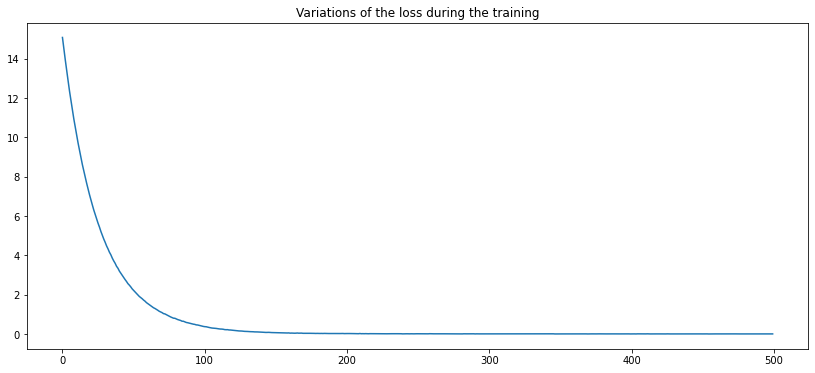

In [ ]:
plt.plot(total_loss )
plt.title('Variations of the loss during the training')
plt.show()

The loss decreases over the training steps (as it should be). We also see, that 500 steps are probably too much, we will adress this problem in chapter 5.
Furthermore multiple plots are genereated to compare the prediction with the real values, including a random ticker input and its prediction.

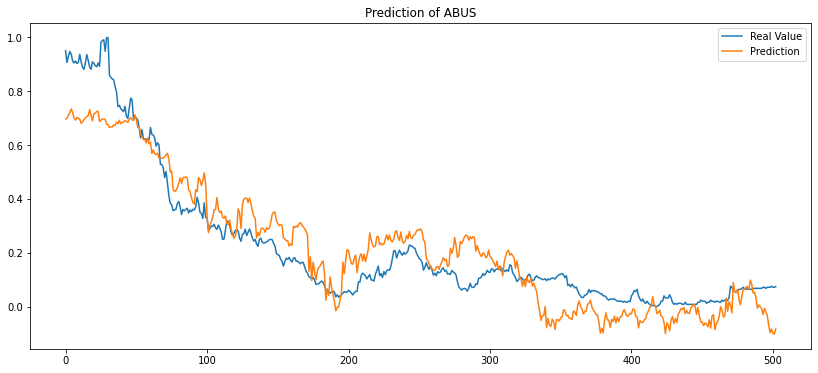

In [ ]:
plot_idx = np.where(list_tickers == 'ABUS')[0][0] #ALDR
# Real value
plt.plot(trainset[plot_idx], label='Real Value')
# Prediction
plt.plot(predic_n[plot_idx], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.savefig('Prediction_of_'+str(list_tickers[plot_idx]))
plt.show()

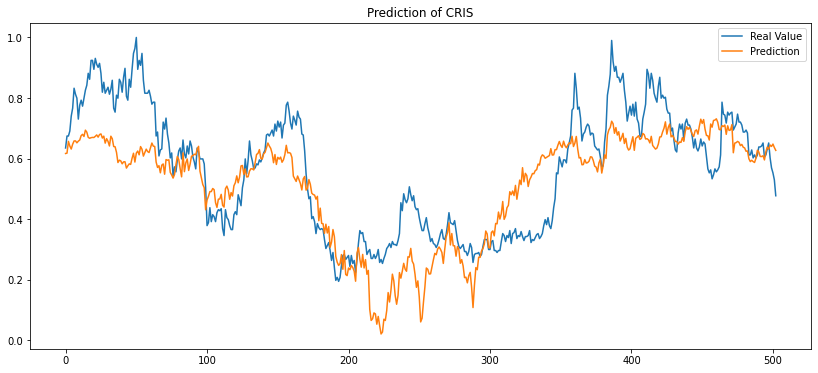

In [ ]:
plot_idx = np.where(list_tickers == 'CRIS')[0][0]
# Real value
plt.plot(trainset[plot_idx], label='Real Value')
# Prediction
plt.plot(predic_n[plot_idx], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.savefig('Prediction_of_'+str(list_tickers[plot_idx]))
plt.show()

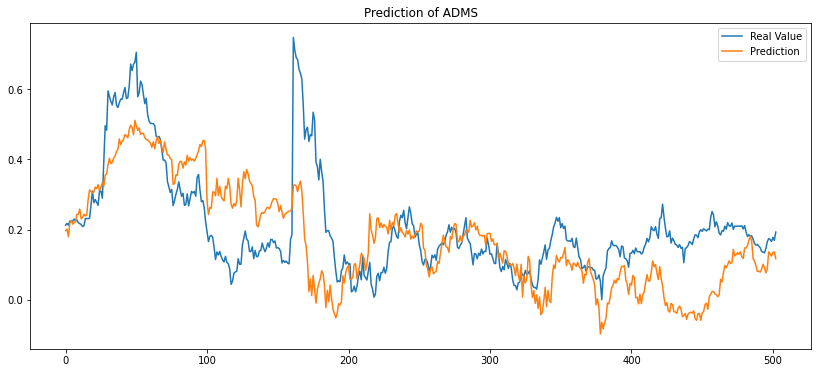

In [ ]:
plot_idx = np.random.randint(low=0, high=len(trainset))
# Real value
plt.plot(trainset[plot_idx], label='Real Value')
# Prediction
plt.plot(predic_n[plot_idx], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.show()

## 4.3 Finding the tickers of the most and least commonals

To identify the 10 most and 15 least commonals, the tickers are sorted by ascending MSE with regard to the trained Autoencoder.

### 4.3.1 Functions

Functions for plotting the tickers in ascending order of MSE and for retrieving the most and least commonals are specified. 

In [ ]:
def plot_commonals(pred_values, real_values, tickers):
    '''
    Create a bar plot of the MSE of the predictions over their real value.
    Warning: the pred_values, real_values and tickers must be sorted the same way!
    
    Modification: description extended
    '''
    # Compute the array of the mean squared errors
    MSE_arr = ((pred_values - real_values)**2).mean(axis=1)
    MSE_df = pd.DataFrame(MSE_arr, index = tickers, columns=['MSE'])
    MSE_df = MSE_df.sort_values('MSE')
    indexes = MSE_df.index
    cutted_indexes = [i for i in indexes]
    for i in range(len(cutted_indexes)):
        if i%5 != 0 and i != 0 and i!= len(cutted_indexes)-1:
            cutted_indexes[i] = ''
    for i in range(2,5):
        cutted_indexes[-i] = ''
    MSE_df = pd.DataFrame(MSE_df.values, index = cutted_indexes, columns=['MSE'])
    MSE_df_test = MSE_df[:]
    MSE_df_test.plot.bar()
    plt.title('Commonals')
    plt.savefig('List of all commonals')
    plt.show()

In [ ]:
def return_commonals(pred_values, real_values, tickers, S): 
    '''
    Return a Data Frame with the MSE of the 10 most commonals and the S-10 least commonals
    (same dataframe as in the plot_commonals function)
    Warning: the pred_values, real_values and tickers must be sorted the same way!
    
    Modification: description extended
    '''
    MSE_arr = ((pred_values - real_values)**2).mean(axis=1)
    MSE_df = pd.DataFrame(MSE_arr, index = tickers, columns=['MSE'])
    MSE_df = MSE_df.sort_values('MSE')

    # Take 10 with lowest MSE (most commonals)
    most_c_df = MSE_df.sort_values('MSE', ascending=True).iloc[:10,:]

    # Take S-10 with highest MSE (least commonals)
    least_c_df = MSE_df.sort_values('MSE', ascending=False).iloc[:(S-10),:]
    
    # Join
    most_least_c_df = pd.concat([most_c_df, least_c_df]) 
    
    return(most_least_c_df)

### 4.3.2 Plot the commonals

The tickers are plotted in ascending order of MSE to visualize the most and least commonals.

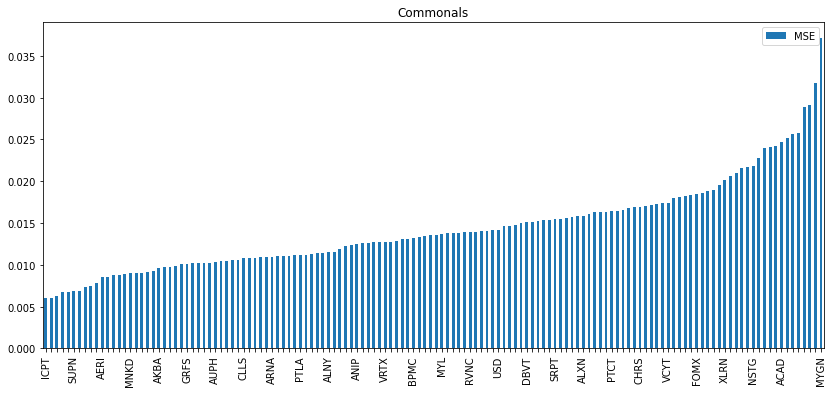

In [ ]:
plot_commonals(predic_n, trainset, list_tickers)

### 4.3.3 Extract most and least commonals

The 10 most and S-10 least commonals represent our portfolio. They are retrieved and stored in a dataframe.

In [ ]:
S = 25
most_least_c_df = return_commonals(predic_n, trainset, list_tickers, S)
print("Portfolio consists of the following tickers:")
display(most_least_c_df)

Portfolio consists of the following tickers:


,MSE
ICPT,0.006003
PRAH,0.006059
ADAP,0.006259
SPPI,0.006759
NBIX,0.006787
SUPN,0.006810
TBPH,0.006840
VNDA,0.007390
ZGNX,0.007522
AMRN,0.007802


## 4.4 Calibration

### 4.4.1 Structure

![AE2.jpg](AE2.jpg)
The second model matches the logaritmic rates of return of the most and least commonals to the ones of a benchmark. Goal is to obtain the weights of each ticker to create a timeseries close to the one of the benchmark. Since we do not want to only recreate the index but outperform it, we modify the benchmark, that we use to calibrate on. For this a similar structure to the first model is used and the earlier defined components can be reused. Nevertheless this second model it is not a real autoencoder, since its input (the rates) are not equal to its output (the weights) only their dimensions match. The S tickers consisting of the 10 most and S-10 least commonals obtained in the last subchapter are fed day by day into the model. Hence this second model consists of a S-dimensional input-layer, a 5-dimensional bottleneck-layer and a S-dimensional output-layer. In the output layer a softmax activation function is used to make sure all weights and their sum are included in the interval [0; 1].  


* softmax:$f(x_{i})=\frac{exp(x_{i})}{\sum_{j}^{S}{exp(x_{j})}}$ with $x_{i}$ being the output of neuron i of the last layer (Nwankpa2018).


In [ ]:
def encoder_calib(input_tensor, S, n_code, phase_train):
    '''
    Creates the encoder of the second autoencoder.

    Modification: description added
    ''' 
    with tfo.variable_scope("calib"):
            
        with tfo.variable_scope('output'):
            output, W_e = layer(input_tensor, S, n_code, phase_train, "encoder", True)
            
    return output, W_e

In [ ]:
def decoder_calib(input_tensor, S, n_code, phase_train):
    '''
    Creates the "decoder" of the second autoencoder.
    
    Modifications: description added, variable activation added
    ''' 
    with tfo.variable_scope("decode"):
        
        with tfo.variable_scope('output'):
            output, W_d = layer(input_tensor, n_code, S, phase_train, "decoder", False)
            
    activation=tfo.nn.softmax(output)
    
    return activation, W_d

### 4.4.2 Additional Data Manipulation

Since we want to use logaritmic rates, we need to inlcude a function that calculates them.

In [ ]:
def logRateOfReturn(df):
    '''
    Calculates the log rates of return of the input.
    
    Args:
    df (np.Series): Series with the adjusted close prices 
    
    Return:
    log_rate_of_returns (np.Series): the logaritmic rates of return
    
    Modification: description extended
    '''   
    # Making sure dataframe is well sorted
    df_sorted = df.sort_index(ascending = True)
    
    shift = 1
    df_shifted = df_sorted.shift(shift)
    log_rate_of_returns = np.log(df_sorted / df_shifted)
    for i in range(shift):
        log_rate_of_returns = log_rate_of_returns.drop(log_rate_of_returns.index[0])

    return log_rate_of_returns

We also want to modify the benchmark so that we set +threshold% instead of drawdown of -threshold% or less. With this modification of the target we should be able to not only reproduce but outperform the index.

In [ ]:
def modify_benchmark(benchmark, threshold):
    '''
    changes the data of adjusted close prices of the benchmark to logaritmic rates of return.
    Additionally values that are equal or lower -threshold are set to threshold.
    
    Args:
    benchmark (np.Series): Series with the adjusted close prices of the benchmark
    threshold (float): cutoff for the logaritmic rates
    
    Return:
    rate (np.Series): the logaritmic rates of return with values set to threshold that are equal or lower -threshold
    
    Modification: description changed
    ''' 
    rate = logRateOfReturn(benchmark)
    for i in range(len(rate)):
        if rate[i] <= - threshold:
            rate[i] = threshold
    return rate

For visualization purposes, a function to show the evolution of the initial investment based on the log rate of returns is defined.

In [ ]:
def reconstruct(rates, P0):
    '''
    Calculates the value of the investment.
    
    Args:
    rates (list): logaritmic rates of return for each ticker
    PO (list): amount of invested money for each ticker of the second model at the start
    
    Return:
    prices (np.Series): value for each ticker of the second model after their courses changed by rates 
    
    Modification: description changed
    ''' 
    prices = [P0]
    for i in range(len(rates)):
        prices.append( np.exp(rates[i]) * prices[i])
    return prices

The daily log returns of the benchmark and the modified benchmark are extracted and plotted. For the cutoff value 0.06 is chosen, so all values below -0.06 are set to this cutoff. 

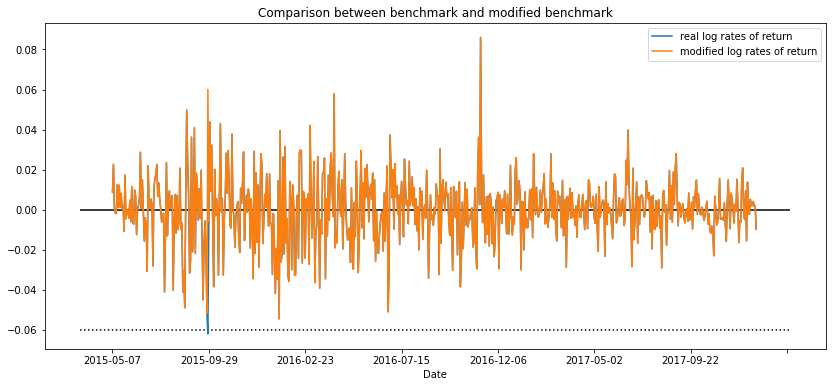

In [ ]:
threshold = 0.06 
benchmark_lrets = logRateOfReturn(df_adjcb[0][model_start_date:model_end_date])
benchmark_lrets_mod = modify_benchmark(df_adjcb[0][model_start_date:model_end_date], threshold)
benchmark_lrets.plot(label='real log rates of return')
benchmark_lrets_mod.plot(label='modified log rates of return')
plt.title('Comparison between benchmark and modified benchmark')
plt.hlines([0,-threshold],xmin,xmax,linestyles=["solid","dotted"])
plt.legend()
plt.savefig('Comparison between benchmark and modified benchmark in terms of ror')
plt.show()

Only 28Sep2015 (day 102) is below threshold and is changed. We stick with that value for consistency with Becker et al. 
Next, to show how the modification changes the course of the benchmark, we plot the courses for the whole time intervall.

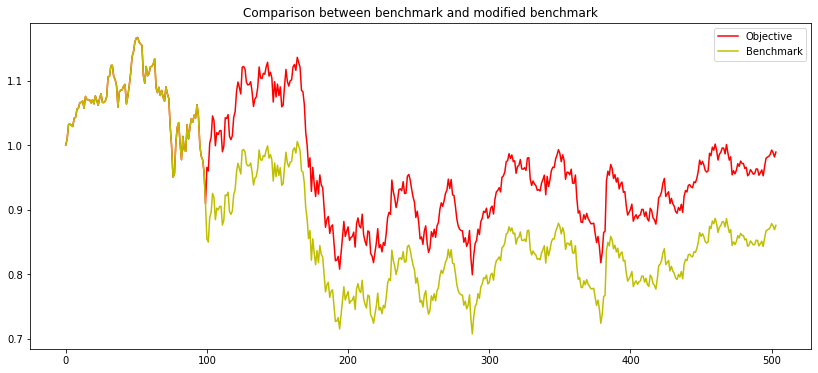

In [ ]:
calib_returns_in = reconstruct(benchmark_lrets_mod[:traindays].values,1)
real_returns_in = reconstruct(benchmark_lrets[:traindays].values,1)
plt.plot(calib_returns_in,'r', label = "Objective")
plt.plot(real_returns_in,'y', label = "Benchmark")
plt.title('Comparison between benchmark and modified benchmark')
plt.legend()
plt.savefig('Comparison between benchmark and modified benchmark in terms of prices')
plt.show()

The logaritmic rates of the tickers from our received portfolio of the commonals are extracted and assigned as input for the model. The train is composed by the traindays first days, the test on the remaining. 

In [ ]:
tickers_ptfolio = most_least_c_df.index
DF_most_least_c = DF_adj_close.loc[:,tickers_ptfolio]
DF_ptfolio_lrets = logRateOfReturn(DF_most_least_c)
X_c_train = DF_ptfolio_lrets.iloc[range(traindays),:].values
X_c_test = DF_ptfolio_lrets.iloc[traindays:,:].values
Y_c_train = benchmark_lrets_mod[:traindays].values
Y_c_test = benchmark_lrets_mod[traindays:].values

In [1]:
for x in [DF_ptfolio_lrets,benchmark_lrets]:
    display(x)

NameError: name 'DF_ptfolio_lrets' is not defined

### 4.4.3 Additional training functions

In the second model final days are used as additionally set (test set) to determine the model performance. This function is defined to calculate the loss of this set. It is similar to the custom loss for the train set but uses the tensorflow function for regularized loss and also returns a summary for tensorboard

In [ ]:
def evaluate(output, x):
    '''
    Specifies the evaluation operation.
    
    Args:
    output: the output of the model
    x:  real value of the output according to the data
    
    Returns:
    val_loss:
    val_summary_op: 

    Modifications: description added
    '''
    with tfo.variable_scope('validation'):
        l2_norm = tfo.sqrt(tfo.reduce_sum(tfo.square(tfo.subtract(output, x, name="val_diff")), 1))
        val_loss = tfo.reduce_mean(l2_norm)
        val_summary_op = tfo.summary.scalar("val_cost", val_loss)
    return val_loss, val_summary_op

Also the function to obtain the batches during training needs to be adjusted since data (portfolio log rates) and labels (benchmark) are separated.

In [ ]:
def next_batch_calib(batch_size, data, labels):
    '''
    Selects a total of batch_size random samples and corresponding labels from data.
    
    Args:
    batch_size (int): size of the batches
    data: rates of return
    labels: corresponding names of the tickers
    
    Returns:
    next_batch (np.array): data for next batch
    next_batch_labels (np.array): corresponding labels of the next batch
    
    Modifications: description extended, variables next_batch and next_batch_labels added
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    next_batch=np.array(data_shuffle)
    next_batch_labels=np.array(labels_shuffle)

    return next_batch, next_batch_labels

### 4.4.4 Training

Now the second model is trained. Again we use the same parameters, that have been tested by Becker et al.(2018).

In [ ]:
# Training Parameters
learning_rate_calib = 0.0004 # learning rate for Adam
num_steps_calib = 500 # number of training steps (epochs)
batch_size_calib = 10 # size of the batches
lambd_calib = 0.1 # lambda for regularization
val_dropout_calib = 0.88 # keep probability for dropout
display_step_calib = 10 # stepsize for printing training epochs

# Network
num_input_calib = S # dimensions of first layer
n_hidden_calib = 5 # dimensions of bottleneck layer
num_output_calib = S # dimensions of last layer

In [ ]:
with tfo.Graph().as_default():
    with tfo.variable_scope("calibration_phase"):
        
        # Placeholders
        x = tfo.placeholder("float", [None, S])
        label = tfo.placeholder("float", [None, 1])
        phase_train = tfo.placeholder(tfo.bool)
        keep_prob = tfo.placeholder(tfo.float32) #gateway for dropout
        sample_size = tfo.placeholder(tfo.float32)

        # outputs of hidden layer and last layer
        hidden, W_e = encoder_calib(x, S, n_hidden_calib, phase_train)
        output, W_d = decoder_calib(hidden, S, n_hidden_calib, phase_train)

        # loss 
        rr_tot = keras.layers.dot([output, x],axes=1)
        mse_value = mse(rr_tot, label)
        cost = loss(mse_value, regularizer(W_e, W_d), lambd_calib, num_input_calib, sample_size)

        train_op = training(cost, learning_rate_calib)
        eval_op, val_summary_op = evaluate(rr_tot, label)

        # Merge all the summaries
        summary_op = tfo.summary.merge_all()

        # Save the trained model for later use
        saver = tfo.train.Saver()        

        # Create the session list for loses that will be filled during training
        total_loss = np.zeros(num_steps_calib)

        # launch the session      
        start_time = time()
        session = tfo.Session()
        init_op = tfo.global_variables_initializer()
        session.run(init_op)
        summary_writer = tfo.summary.FileWriter(logs_path, graph=tfo.get_default_graph())
        for i in range(1, num_steps_calib + 1):
            total_batch = int(len(X_c_train) / batch_size_calib)
            for j in range(total_batch):
                mini_batch_x, mini_batch_y = next_batch_calib(batch_size_calib, X_c_train, Y_c_train)
                _, loss_batch, summary = session.run([train_op, cost, summary_op], 
                            feed_dict={x: mini_batch_x , label: mini_batch_y.reshape((batch_size_calib,1)), 
                                       phase_train: True, keep_prob: val_dropout_calib, sample_size:  batch_size_calib})
            total_loss[i-1] = loss_batch
            
            #create summaries for TensorBoard
            summary_writer.add_summary(summary, i)
            if i % display_step_calib == 0:
                    print('Step %i : Minibatch Loss: %f' % (i, loss_batch))
                    curr_time = time()
                    elapsed_time = curr_time-start_time
                    print('Estimated remaining time = ', elapsed_time / i * (num_steps_calib-i),'s\n')
                    
        # Get the outputs (weights) at the end for the train data
        predi_calib_in = session.run(output , feed_dict={x: X_c_train , label: Y_c_train.reshape((len(Y_c_train),1)), phase_train: False, keep_prob: 1, sample_size: X_c_train.shape[0]})
        
        # Get the outputs (weights) at the end for the test data
        predi_calib_out, loss_frontier, dot_prod = session.run([output, mse_value, rr_tot] , feed_dict={x: X_c_test , label: Y_c_test.reshape((len(Y_c_test),1)), phase_train: False, keep_prob: 1, sample_size: X_c_test.shape[0]})

Step 10 : Minibatch Loss: 0.012509
Estimated remaining time =  62.890294551849365 s

Step 20 : Minibatch Loss: 0.005674
Estimated remaining time =  52.33854675292969 s

Step 30 : Minibatch Loss: 0.002578
Estimated remaining time =  46.86965934435526 s

Step 40 : Minibatch Loss: 0.001133
Estimated remaining time =  43.73079824447632 s

Step 50 : Minibatch Loss: 0.000467
Estimated remaining time =  41.65319538116455 s

Step 60 : Minibatch Loss: 0.000174
Estimated remaining time =  39.913910706837974 s

Step 70 : Minibatch Loss: 0.000057
Estimated remaining time =  38.44256615638733 s

Step 80 : Minibatch Loss: 0.000016
Estimated remaining time =  37.202074348926544 s

Step 90 : Minibatch Loss: 0.000005
Estimated remaining time =  36.01863188213772 s

Step 100 : Minibatch Loss: 0.000004
Estimated remaining time =  34.89323902130127 s

Step 110 : Minibatch Loss: 0.000002
Estimated remaining time =  33.774400754408404 s

Step 120 : Minibatch Loss: 0.000001
Estimated remaining time =  32.748

### 4.4.4 Performance

To evaluate the training the loss of the training is plotted.

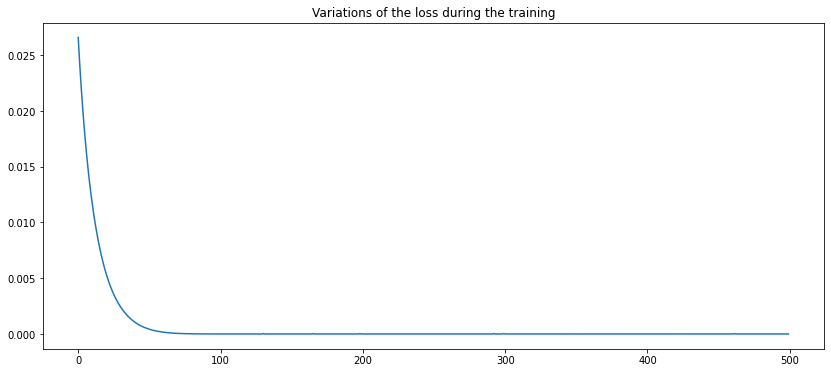

In [ ]:
plt.plot(total_loss)
plt.title('Variations of the loss during the training')
plt.show()

We also want to compare the predicted total log rates of our model to the log rates of the benchmark. We therefore need to calculate the dot product of the predicted relative share of each ticker with the corresponding rates of the tickers. The weights of the tickers need to be normalized first, so that they sum up to 1 and represent the true relative share of each ticker for the portfolio. After this the log rates are plotted.

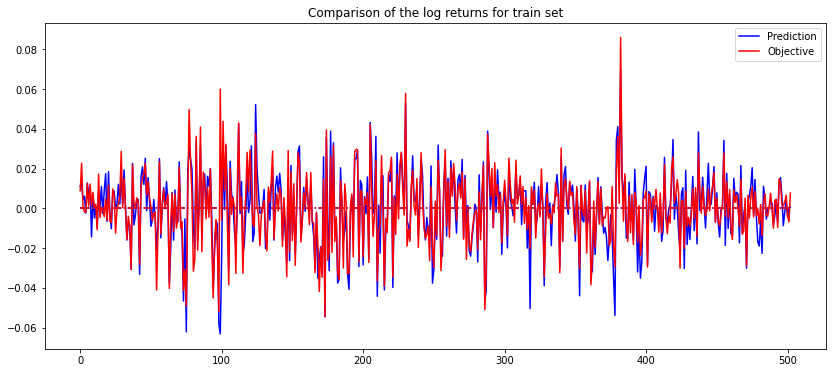

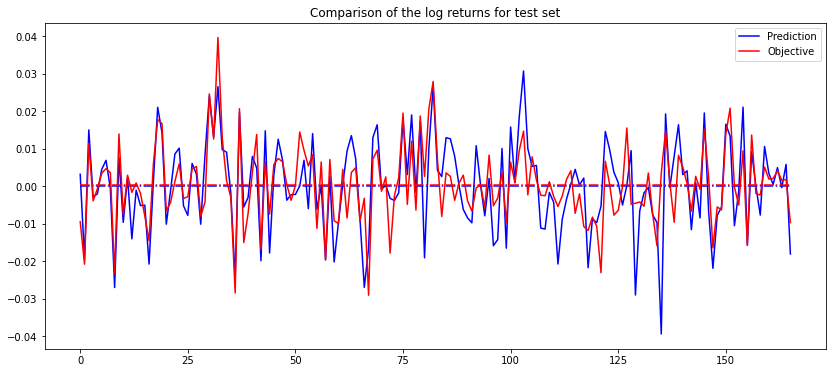

In [ ]:
n_in = len(predi_calib_in)
weights_ptfolio_in = [0]*S
for i in range(S):
    for j in predi_calib_in:
        weights_ptfolio_in[i] += j[i]/n_in        
n_out = len(predi_calib_out)
weights_ptfolio_out = [0]*S
for i in range(S):
    for j in predi_calib_out:
        weights_ptfolio_out[i] += j[i]/n_out
        
#total log rates
ptfolio_lrets_in = np.dot(X_c_train, weights_ptfolio_in)
ptfolio_lrets_out = np.dot(X_c_test, weights_ptfolio_out)

#benchmark log rates (for comparison)
real_benchmark_lrets_test = benchmark_lrets[traindays:].values
real_benchmark_lrets_train = benchmark_lrets[:traindays].values

#plotting train data
plt.plot(ptfolio_lrets_in,'b', label = "Prediction")
plt.plot([np.mean(ptfolio_lrets_in)]*len(ptfolio_lrets_in),'b-.')
plt.plot(Y_c_train,'r', label = "Objective")
plt.plot([np.mean(Y_c_train)]*len(Y_c_train),'r-.')
plt.legend()
plt.title('Comparison of the log returns for train set')
plt.show()

#plotting test data
plt.plot(ptfolio_lrets_out,'b', label = "Prediction")
plt.plot([np.mean(ptfolio_lrets_out)]*len(ptfolio_lrets_out),'b-.')
plt.plot(Y_c_test,'r', label = "Objective")
plt.plot([np.mean(Y_c_test)]*len(Y_c_test),'r-.')
plt.legend()
plt.title('Comparison of the log returns for test set')
plt.show()

To further assess the performance of the portfolio, the value developements with a given start investment (=1) of the portfolio, the real benchmark and the modified benchmark are reconstructed. This is done with the train set first and the test set last.

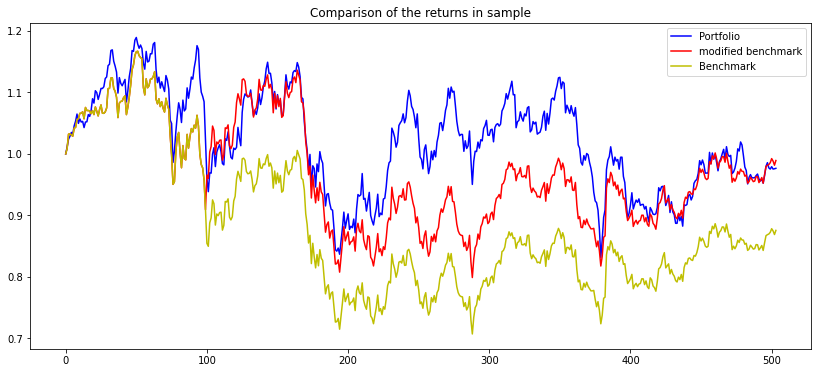

In [ ]:
portfolio_returns_in = reconstruct(ptfolio_lrets_in,1)
calib_returns_in = reconstruct(Y_c_train,1)
real_returns_in = reconstruct(real_benchmark_lrets_train,1)
plt.plot(portfolio_returns_in,'b', label = "Portfolio")
plt.plot(calib_returns_in,'r', label = "modified benchmark")
plt.plot(real_returns_in,'y', label = "Benchmark")
plt.title('Comparison of the returns in sample')
plt.legend()
plt.savefig('Comparison of the returns in sample')
plt.show()

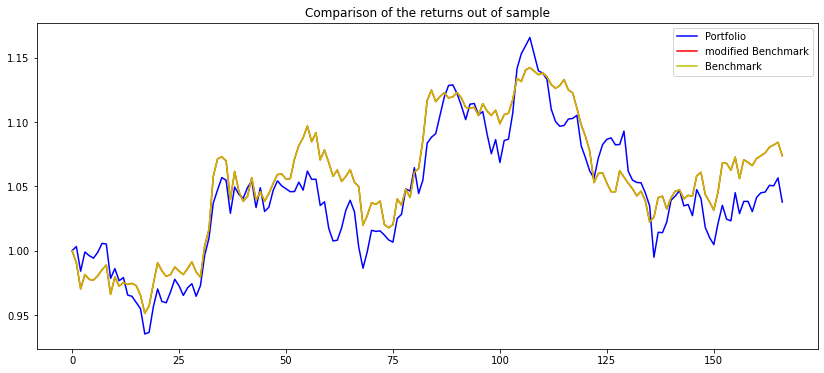

In [ ]:
portfolio_returns_out = reconstruct(ptfolio_lrets_out,1)
calib_returns_out = reconstruct(Y_c_test,1)
real_returns_out = reconstruct(real_benchmark_lrets_test,1)
plt.plot(portfolio_returns_out,'b', label = "Portfolio") # Portfolio
plt.plot(calib_returns_out,'r', label = "modified Benchmark")
plt.plot(real_returns_out,'y', label = "Benchmark")
plt.title('Comparison of the returns out of sample')
plt.legend()
plt.savefig('Comparison of the returns out of sample')
plt.show()

Since there are now outliers below the threshold in test set, the modified benchmark is equal to the benchmark.

## 4.5 Visualization on Tensorboard

[TensorBoard](https://www.tensorflow.org/tensorboard) is an interactive visualization tool to present, compare, analyze and show machine learning techniques. It offers methods to visualize the computation graphs, multidimensional data and how different parameters change during training with multiple training statistics. Specifically we use it in this notebook to visualize the final results. Therefore open a new shell and execute the follwing commands.

In [ ]:
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs/autoencoder1/"+date+"/" \
          "\nThen open http://0.0.0.0:6006/ into your web browser\n\n")
print("Or Run the command line:\n" \
          "--> python -m tensorboard.main --logdir=C:\\tmp\\tensorflow_logs\\autoencoder1\\"+date+"\\" \
          "\nThen open http://desktop-p6qj80l:6006/ into your web browser, or anything the command tells you to type\n\n")

Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_logs/autoencoder1/1592572821/
Then open http://0.0.0.0:6006/ into your web browser


Or Run the command line:
--> python -m tensorboard.main --logdir=C:\tmp\tensorflow_logs\autoencoder1\1592572821\
Then open http://desktop-p6qj80l:6006/ into your web browser, or anything the command tells you to type




# 5 Modelling with Tensorflow2

In order to present an innovative work, we tought to translate the TF1 coding in Keras, ranked as #1 for deep learning both among primary frameworks and among all frameworks used. [Keras](https://keras.io/why_keras/) presents many advantages, including:

- User-Friendly: Keras has a simple, consistent interface optimized for common use cases which provides clear and actionable feedback for user errors.

- Modular and Composable: Keras models are made by connecting configurable building blocks together, with few restrictions.

- Easy To Extend: With the help of Keras, you can easily write custom building blocks for new ideas and researches.

- Easy To Use: Keras offers consistent & simple APIs which helps in minimizing the number of user actions required for common use cases, also it provides clear and actionable feedback upon user error



## 5.1 AE1 (Market)


### 5.1.1 Structure

We use Keras for the components and start directly by defining AE1 analogical to chapter 4. 

(For Dropout and BatchNormalization see Chapter 4.1.2)



In [ ]:
def build_model(n_bottleneck=5, n_hidden=250, learning_rate= 0.0004, DOrate= 0.11, lambd=0.0001):
    encoder = keras.models.Sequential([keras.layers.Dropout(input_shape=[traindays], rate=DOrate, name='EncDropout1'),
                                   keras.layers.BatchNormalization(name="EncBatchNorm1"),
                                   keras.layers.Dense(n_hidden, activation="tanh",kernel_initializer='glorot_normal', bias_initializer='zeros',name="EncDense1"),
                                   keras.layers.Dropout(rate=DOrate,name="EncDropout2"),
                                   keras.layers.BatchNormalization(name="EncBatchNorm2"),
                                   keras.layers.Dense(n_bottleneck, activation="tanh",kernel_regularizer=regularizers.l2(lambd), name="EncDense2")])
    decoder = keras.models.Sequential([keras.layers.Dropout(input_shape = [n_bottleneck],rate=DOrate,name="DecDropout1"),
                                   keras.layers.BatchNormalization(name="DecBatchNorm1"),
                                   keras.layers.Dense(n_hidden, activation= "tanh",kernel_initializer='glorot_normal',bias_initializer='zeros', name="DecDense1"),
                                   keras.layers.Dropout(rate=DOrate,name="DecDropout2"),   
                                   keras.layers.BatchNormalization(name="DecBatchNorm2"),
                                   keras.layers.Dense(traindays, activation = "tanh",kernel_regularizer=regularizers.l2(lambd),name="DecDense2")])
    model = keras.models.Sequential([encoder, decoder])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 5)                 130267    
_________________________________________________________________
sequential_1 (Sequential)    (None, 503)               128773    
Total params: 259,040
Trainable params: 257,024
Non-trainable params: 2,016
_________________________________________________________________


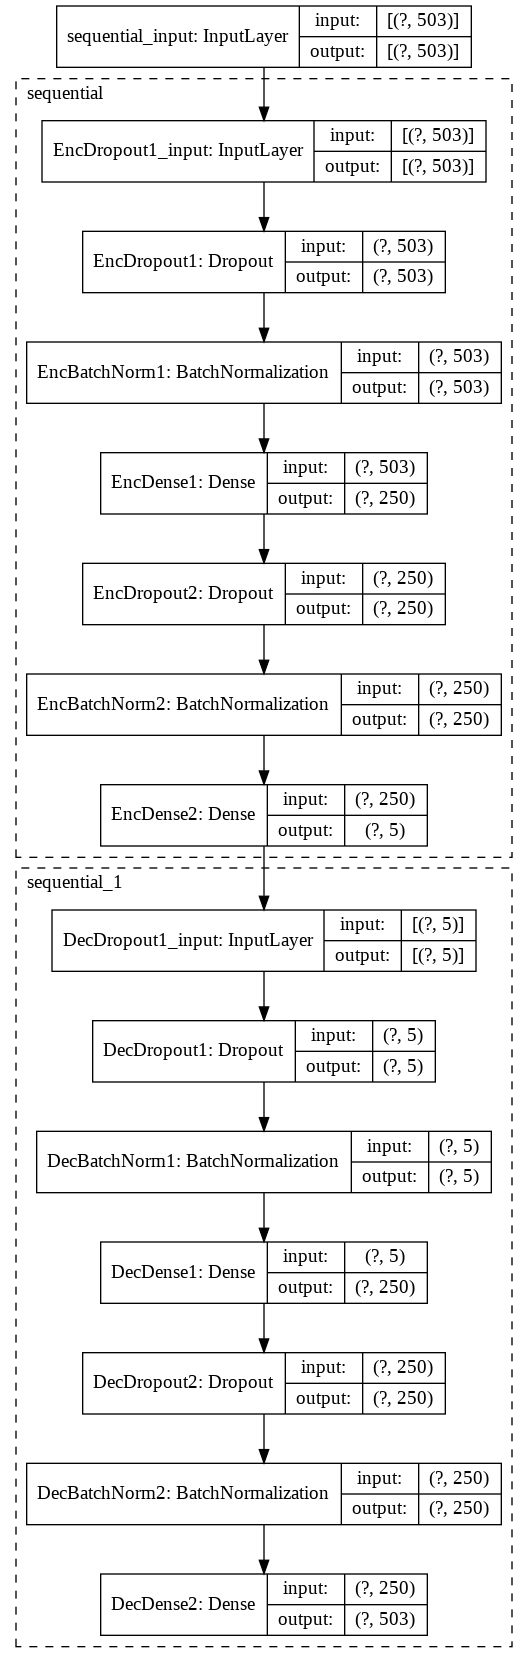

In [ ]:
ae=build_model()
ae.summary()
keras.utils.plot_model(ae, show_shapes = True, show_layer_names = True, expand_nested=True)

To see, which parameters are preforming best for our model we implemtented grid search. We therefore use Scikit-Learn’s GridSearchCV as an alternative to fiddling with the hyperparameters manually until finding a great combination of them. The only thing to do is telling which hyperparameters we want it to try on with and what values to try out. GridSearchCV then uses cross-validation to evaluate all possible combinations of hyperparameter values (Géron 2019).

We replace the values for the number of neurons in the hidden layer, the learning rate, the dropout rate and the lambda for regularization by variables. 

 Gridsearch might take a while you can toggle it off with gridsearch=False.


In [ ]:
gridsearch=True # activate/deactivate grid search by setting gridsearch=True resp. gridsearch=False

We use the same data for training as in the previous chapter. This is the normalized adjusted close prices from DF_adj_close_n of the first traindays of all tickers

In [ ]:
train =DF_adj_close_n.iloc[0:traindays,:].values.T

In [ ]:
#Grid search
if gridsearch:
    keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
    param_distribs = {"n_hidden": [250,350], "learning_rate": [0.0004,0.001],"DOrate": [0.11,0.2],"lambd": [0.0001,0.001,0.01]}
    Grid_search_cv = GridSearchCV(keras_reg, param_distribs, cv=3)
    print("Doing Grid Search. This might take a while!")
    result_gs=Grid_search_cv.fit(train, train)  

Doing Grid Search. This might take a while!
5/5 [==============================] - 0s 8ms/step - loss: 0.4694


In [ ]:
if gridsearch:
    print("The best parameters according to the grid search are:")
    display(result_gs.best_params_)

The best parameters according to the grid search are:


{'DOrate': 0.11, 'lambd': 0.0001, 'learning_rate': 0.001, 'n_hidden': 250}

### 5.1.2 Training


Simply calling its fit, we train the model. However too few epochs can lead to underfitting of the training dataset, whereas too many may result in an overfit model.

Hence the number of training steps is an important parameter for the model. In contrast to the 500 epochs of tensorflow1 we chose 100, because the training error does not decrease afterwards. For speeding up the training and also to prevent overfitting we added early stopping. This is a method that allows to specify an arbitrary large number of training epochs and stops training once the model performance stops improving on a hold out validation dataset. If you want to run the training multiple times you have to rebuild the model or else the training proceeds instead of restarts.
_You can set verbose=0 to suppress the print output._


In [ ]:
# rebuild the model
ae=build_model()

In [ ]:
#inlcude early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
#training
history = ae.fit(train, train, epochs=100, batch_size=30, callbacks=[early_stopping_cb], validation_data=[train, train],verbose=1) 

Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 0.5003 - val_loss: 0.0341
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4203 - val_loss: 0.0339
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.3486 - val_loss: 0.0337
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.3067 - val_loss: 0.0335
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2789 - val_loss: 0.0333
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2704 - val_loss: 0.0331
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2593 - val_loss: 0.0329
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.2523 - val_loss: 0.0327
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2464 - val_loss: 0.0325
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2403 - val_loss: 0.0322
Epoch 11/100
5/5 [=

### 5.1.3 Performance


The next steps are done analogical to chapter 4. We visualize the training performance by plotting the loss of each training step first.

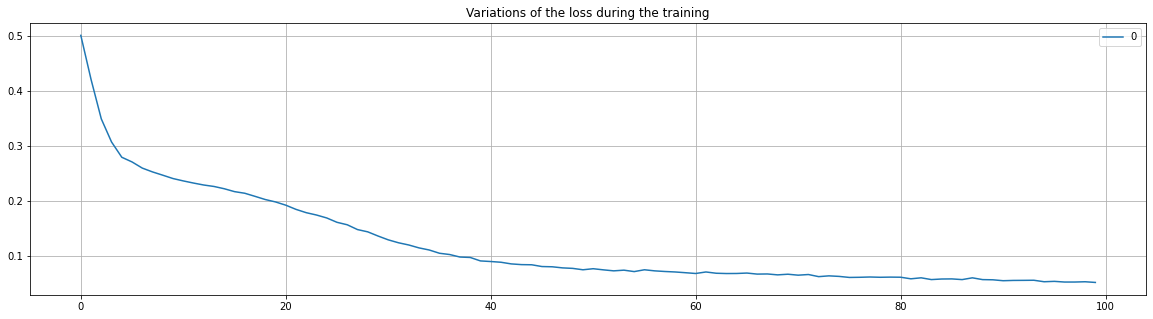

In [ ]:
pd.DataFrame(history.history['loss']).plot(figsize=(20,5))
plt.grid(True)
plt.title('Variations of the loss during the training')
plt.show()

We also plot some predictions of the model versus the real data.

In [ ]:
prediction = ae.predict(train)

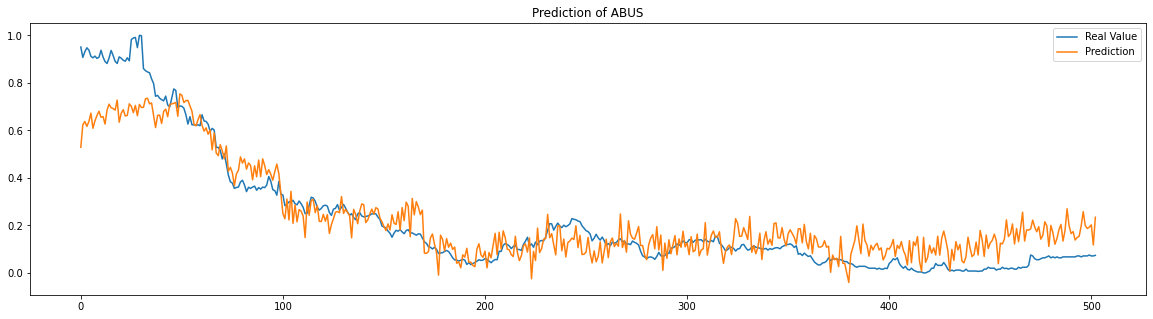

In [ ]:
#real values
plot_idx = np.where(list_tickers == 'ABUS')[0][0]
plt.figure(1, figsize=(20, 5))
plt.plot(train[plot_idx], label='Real Value')

# Prediction
plt.plot(prediction[plot_idx,:], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.savefig('Prediction_of_' + str(list_tickers[plot_idx])+'_TF2')
plt.show()

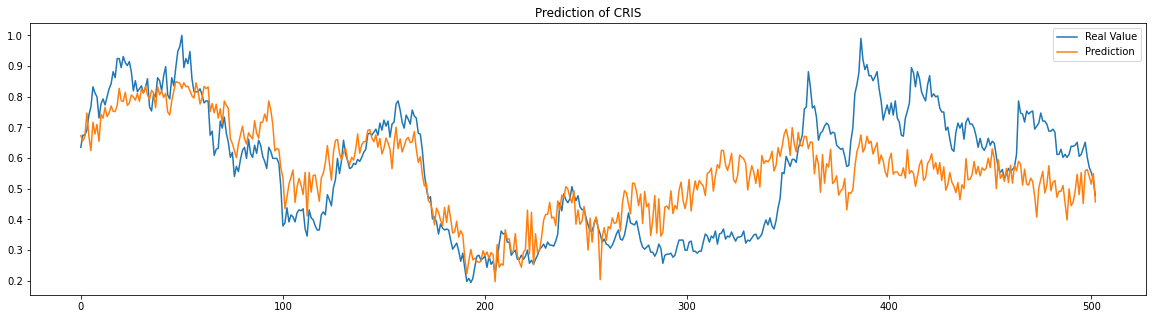

In [ ]:
plot_idx = np.where(list_tickers == 'CRIS')[0][0]
# Real value
plt.figure(1, figsize=(20, 5))
plt.plot(train[plot_idx], label='Real Value')
# Prediction
plt.plot(prediction[plot_idx], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.savefig('Prediction_of_' + str(list_tickers[plot_idx])+"_TF2")
plt.show()

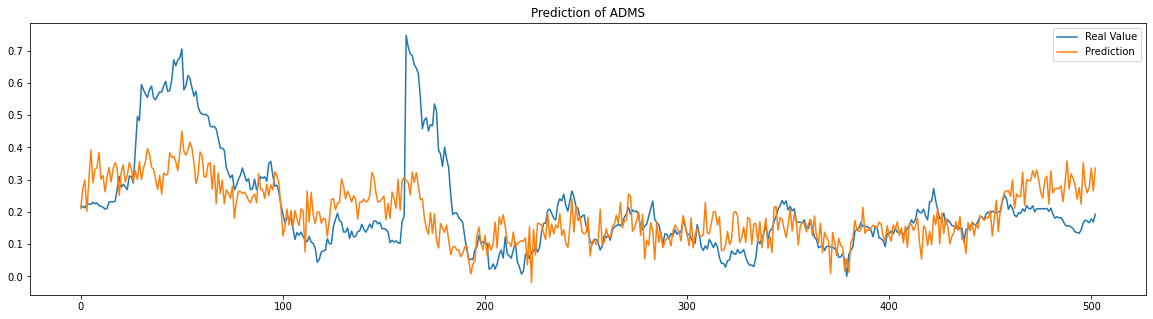

In [ ]:
plot_idx = np.random.randint(low=0, high=len(train))
# Real value
plt.figure(1, figsize=(20, 5))
plt.plot(train[plot_idx], label='Real Value')
# Prediction
plt.plot(prediction[plot_idx], label='Prediction')
plt.title('Prediction of ' + str(list_tickers[plot_idx]))
plt.legend()
plt.show()

## 5.2 Get Commonals

We again plot the tickers by ascending MSE to get the most and least commonals.

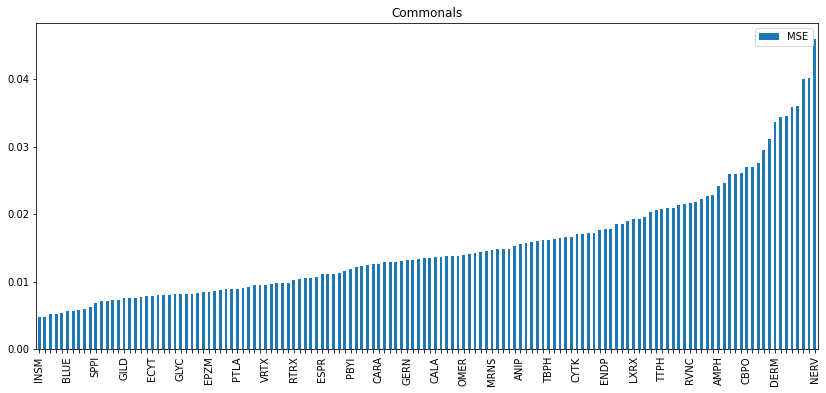

In [ ]:
plot_commonals(prediction, train, list_tickers)

And we extract the 10 most and 15 least commonals for the second autoencoder

In [ ]:
most_least_c_df = return_commonals(prediction, train, list_tickers, S)
display(most_least_c_df)

,MSE
INSM,0.004739
SAGE,0.004767
PRAH,0.005186
SUPN,0.005279
ALNY,0.005380
BLUE,0.005666
FGEN,0.005682
BPMC,0.005809
CORI,0.006001
HALO,0.006283


## 5.3 Calibration

### 5.3.1 Structure

The second model is a bit more complicated since we have to model it with a dot (product) layer to be able to compare the outputs to the log rates of the benchmarks. Hence the linear Sequential model can't be applied and the [functional coding of keras](https://keras.io/guides/functional_api/) is used.

In [ ]:
#Parameters
dr_calib=1-val_dropout_calib
activation_calib="softmax"

In [ ]:
#Layers
log_rates = keras.Input(shape=[num_input_calib],name="Input")
do1= keras.layers.Dropout(rate=dr_calib)(log_rates)
bn1= keras.layers.BatchNormalization()(do1)
de1= keras.layers.Dense(n_hidden_calib, kernel_initializer='glorot_normal', bias_initializer='zeros',kernel_regularizer=regularizers.l2(lambd_calib/2))(bn1)
do2= keras.layers.Dropout(rate=dr_calib)(de1)
bn2= keras.layers.BatchNormalization()(do2)
tick_weights= keras.layers.Dense(num_output_calib, activation=activation_calib, kernel_initializer='glorot_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(lambd_calib/2))(bn2)
rates_tot= keras.layers.dot([log_rates,tick_weights], axes=1)

rr_tot = keras.Model(log_rates, rates_tot, name="rr_tot")
rr_tot.compile(loss= "mse", optimizer=keras.optimizers.Adam(learning_rate=learning_rate_calib))
rr_tot.summary()

Model: "rr_tot"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 25)]         0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 25)           0           Input[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 25)           100         dropout[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            130         batch_normalization[0][0]        
_____________________________________________________________________________________________

### 5.3.2 Training

Similar to chapter 4 we define the train and test set.

In [ ]:
tickers_ptfolio_2 = most_least_c_df.index
DF_most_least_c_2 = DF_adj_close.loc[:,tickers_ptfolio_2]
DF_ptfolio_lrets_2 = logRateOfReturn(DF_most_least_c_2)
X_c_train_2 = DF_ptfolio_lrets_2.iloc[range(traindays),:].values
X_c_test_2 = DF_ptfolio_lrets_2.iloc[traindays:,:].values
Y_c_train_2 = Y_c_train # benchmark_lrets_mod[:traindays].values
Y_c_test_2 = Y_c_test # benchmark_lrets_mod[traindays:].values

And we execute the training

In [ ]:
history1= rr_tot.fit(X_c_train_2, Y_c_train_2, epochs=num_steps_calib, batch_size=batch_size_calib, validation_data=[X_c_test_2, Y_c_test_2], verbose=1 )

Epoch 1/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6763 - val_loss: 0.6287
Epoch 2/500
51/51 [==============================] - 0s 3ms/step - loss: 0.5885 - val_loss: 0.5472
Epoch 3/500
51/51 [==============================] - 0s 2ms/step - loss: 0.5124 - val_loss: 0.4764
Epoch 4/500
51/51 [==============================] - 0s 2ms/step - loss: 0.4460 - val_loss: 0.4146
Epoch 5/500
51/51 [==============================] - 0s 3ms/step - loss: 0.3881 - val_loss: 0.3606
Epoch 6/500
51/51 [==============================] - 0s 2ms/step - loss: 0.3375 - val_loss: 0.3135
Epoch 7/500
51/51 [==============================] - 0s 3ms/step - loss: 0.2933 - val_loss: 0.2723
Epoch 8/500
51/51 [==============================] - 0s 2ms/step - loss: 0.2546 - val_loss: 0.2362
Epoch 9/500
51/51 [==============================] - 0s 2ms/step - loss: 0.2208 - val_loss: 0.2048
Epoch 10/500
51/51 [==============================] - 0s 3ms/step - loss: 0.1913 - val_loss: 0.1773
Epoch 11/

### 5.3.3 Performance

Again we plot the loss during training to asses the performance.

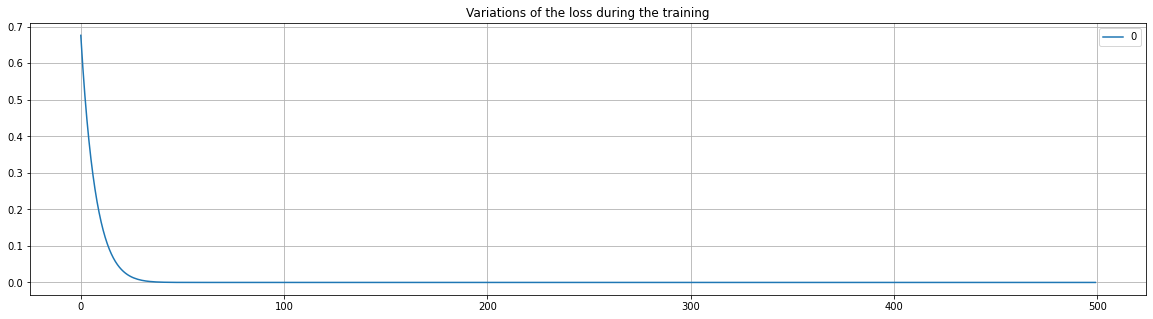

In [ ]:
pd.DataFrame(history1.history['loss']).plot(figsize=(20,5))
plt.grid(True)
plt.title('Variations of the loss during the training')
plt.show()

For further evaluation we want to access the weights of the tickers. They are stored in the second to last layer. We therefore build a a copy of our model and exclude the last layer in this new model.

In [ ]:
ticker_weights=keras.Model(log_rates, tick_weights, name="ticker_weights")
ticker_weights.set_weights(rr_tot.get_weights())
ticker_weights.compile(loss= "mse", optimizer=keras.optimizers.Adam(learning_rate=learning_rate_calib))

Now we are able to directly get the weights to a specific input. We use this to predict the weights of the tickers for train and test set.

In [ ]:
prediction1_2= ticker_weights.predict(X_c_train_2)
prediction2_2= ticker_weights.predict(X_c_test_2)

We also want to compare the predicted total log rates of our model to the log rates of the benchmark. Therefore we do the same as in chapter 4. We calculate the dot product of the predicted relative share of each ticker with the corresponding rates of the tickers.

In [ ]:
n_in = len(prediction1_2)
weights_ptfolio_in_2 = [0]*S
for i in range(S):
    for j in prediction1_2:
        weights_ptfolio_in_2[i] += j[i]/n_in

In [ ]:
n_out = len(prediction2_2)
weights_ptfolio_out_2 = [0]*S
for i in range(S):
    for j in prediction2_2:
        weights_ptfolio_out_2[i] += j[i]/n_out

In [ ]:
#log rates of Portfolio
ptfolio_lrets_in_2 = np.dot(X_c_train_2, weights_ptfolio_in_2)
ptfolio_lrets_out_2 = np.dot(X_c_test_2, weights_ptfolio_out_2)

#Reminder: log rates of benchmark
#real_benchmark_lrets_train=logRateOfReturn(df_adjcb[0][0:traindays].reset_index(drop=True))
#real_benchmark_lrets_test =logRateOfReturn(df_adjcb[0][traindays:].reset_index(drop=True))

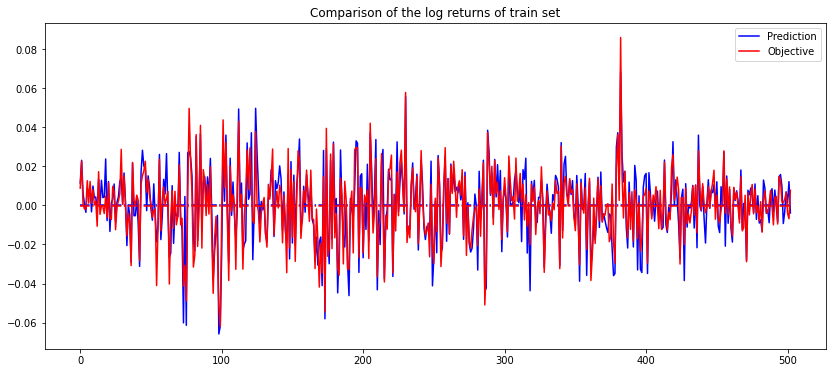

In [ ]:
plt.plot(ptfolio_lrets_in_2,'b', label = "Prediction")
plt.plot([np.mean(ptfolio_lrets_in_2)]*len(ptfolio_lrets_in_2),'b-.')
plt.plot(real_benchmark_lrets_train,'r' , label = "Objective")
plt.plot([np.mean(real_benchmark_lrets_train)]*len(real_benchmark_lrets_train),'r-.')
plt.legend()
plt.title('Comparison of the log returns of train set')
plt.show()

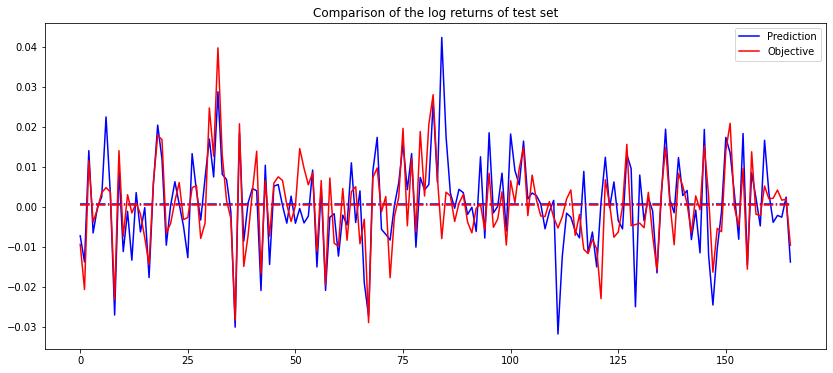

In [ ]:
plt.plot(ptfolio_lrets_out_2,'b', label = "Prediction")
plt.plot([np.mean(ptfolio_lrets_out_2)]*len(ptfolio_lrets_out_2),'b-.')
plt.plot(real_benchmark_lrets_test,'r' , label = "Objective")
plt.plot([np.mean(real_benchmark_lrets_test)]*len(real_benchmark_lrets_test),'r-.')
plt.legend()
plt.title('Comparison of the log returns of test set')
plt.show()

To further assess the performance of the portfolio, the value developements with a given start investment (=1) of the portfolio, the real benchmark and the modified benchmark are reconstructed. This is done with the train set first and the test set last.

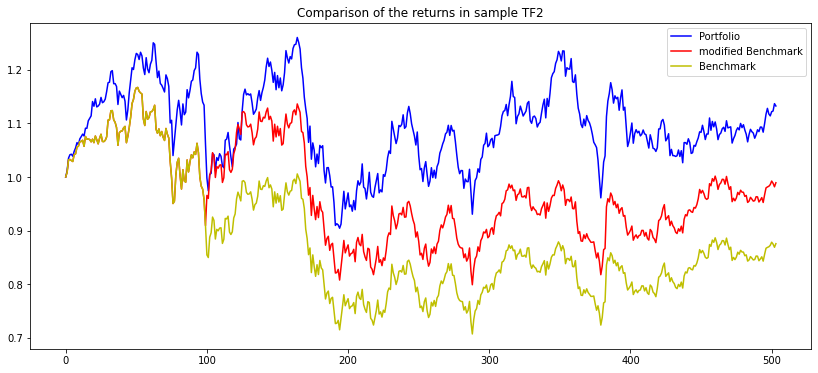

In [ ]:
portfolio_returns_in_2 = reconstruct(ptfolio_lrets_in_2,1)
#calib_returns_in = reconstruct(Y_c_train,1)
plt.plot(portfolio_returns_in_2,'b', label = "Portfolio")
plt.plot(calib_returns_in,'r', label = "modified Benchmark")
plt.plot(real_returns_in,'y', label = "Benchmark")
plt.title('Comparison of the returns in sample TF2')
plt.legend()
plt.savefig('Comparison of the returns in sample TF2')
plt.show()

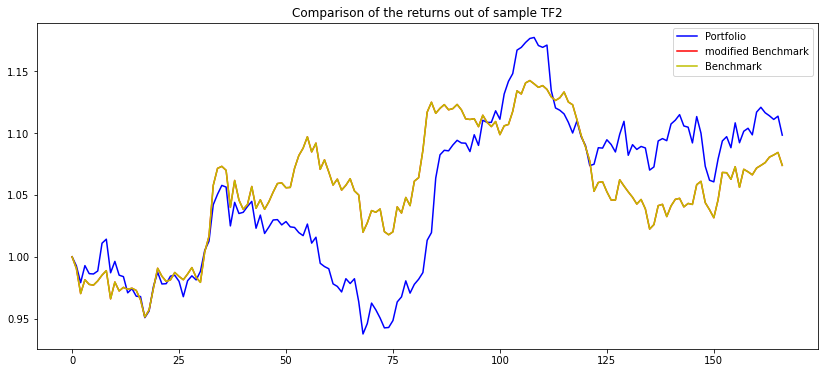

In [ ]:
portfolio_returns_out_2 = reconstruct(ptfolio_lrets_out_2,1)
calib_returns_out = reconstruct(Y_c_test,1)
plt.plot(portfolio_returns_out_2,'b', label = "Portfolio") # Portfolio
plt.plot(calib_returns_out,'r', label = "modified Benchmark")
plt.plot(real_returns_out,'y', label = "Benchmark")
plt.title('Comparison of the returns out of sample TF2')
plt.legend()
plt.savefig('Comparison of the returns out of sample TF2')
plt.show()

## 6 Export for Quantopian

For applying the technique to an other index Becker et al. (2018) created an algorithm for quantopian. We present the data preparation and the code for Quantopian. However it is not possible to execute this code inside this notebook.  

## 6.1 Prepare Data for Quantopian

Starting with the data preparation the resulting weights are stored into dataframes of the following structure:

|   date  | symbol | weight | price |
|---------|--------|--------|-----------|
| 671 obs |   AA   |   0.1  |    28.7   |
|   ...   |  ...   |   ...  |    ...    |

In [ ]:
nb_days = len(dates)
out_df = pd.DataFrame(index=np.arange(nb_days*S), columns=['date', 'symbol', 'weight', 'price'])
out_df_2 = out_df.copy()

We add one dataframe for the weights obtained by each of TensorFlow1 and TensorFlow2.

In [ ]:
for i in range(S):
    for j in range(nb_days):
        arr_temp = [dates[j], tickers_ptfolio[i], weights_ptfolio_in[i], DF_most_least_c.iloc[j, i]]
        arr_temp_2 = [dates[j], tickers_ptfolio_2[i], weights_ptfolio_in_2[i], DF_most_least_c_2.iloc[j, i]]
        out_df.iloc[i * nb_days + j, :] = arr_temp
        out_df_2.iloc[i * nb_days + j, :] = arr_temp_2
    print(tickers_ptfolio[i], ':included')

ICPT :included
PRAH :included
ADAP :included
SPPI :included
NBIX :included
SUPN :included
TBPH :included
VNDA :included
ZGNX :included
AMRN :included
MYGN :included
GWPH :included
ITCI :included
ARWR :included
TLGT :included
CERS :included
INO :included
ACAD :included
ACOR :included
PACB :included
JAZZ :included
TXMD :included
NSTG :included
LMNX :included
RIGL :included


## 6.2 Export the data to csv

The dataframes are exported to CSV.

In [ ]:
with open( 'Weigths.csv', 'a' ) as f:
    out_df.to_csv( f, index=False)
with open( 'Weights2.csv','a' ) as f:
    out_df_2.to_csv( f, index=False)

In [ ]:
## 6.3 Code for Quantopian 

Here we just copy the Quantopian code of Becker et al. (2018) and try to explain its main functions. It is not possible to execute the code inside this notebook. You have to either use [Quantopian zipline](https://github.com/quantopian/zipline) or [Quantopian Algorithm IDE](https://www.quantopian.com/algorithms#algorithms_tab).

# Algorithm API imports
import quantopian.algorithm as algo
import pandas as pd
import datetime

# PLEASE CUT AND PASTE ALL THE DOCUMENT ON AN EMPTY QUANTOPIAN ALGORITHM
# THIS CODE WON'T WORK ON ANY USUAL PYTHON PLATFORM

#==============================================================================

# SET A INVESTMENT SIZE OF 100K$

# IN RANGE: 05/05/2015 to 05/02/2017
# OUT RANGE: 06/03/2017 to 12/28/2017

# CHOOSE ONE OF THE FOLLOWING:
# IBB OUT SAMPLE:
# https://dl.dropboxusercontent.com/s/lagetj445dxzpma/Weigths.csv?dl=0
# SP IN SAMPLE:
# https://dl.dropboxusercontent.com/s/numgde3pubor5yj/Weigths_in.csv?dl=0
# SP OUT SAMPLE:
# https://dl.dropboxusercontent.com/s/ozf1vuoopcvxxup/Weigths_out.csv?dl=0

URL = 'https://dl.dropboxusercontent.com/s/ozf1vuoopcvxxup/Weigths_out.csv?dl=0'

#==============================================================================

def preview(df):
    log.info(' \n %s ' % df.head())
    return df

#==============================================================================

def initialize(context):

    fetch_csv(URL,
              pre_func=preview,
              date_column='date',
              date_format='%Y-%m-%d'
              )

    # Set the benchmark to the IBB - 22445
    # set_benchmark(sid(22445))
    # Set the benchmark to the SPY - 8554
    set_benchmark(sid(8554))

    # Rebalance every day, at end of day to account for forward bias
    algo.schedule_function(
        rebalance,
        algo.date_rules.month_start(),
        algo.time_rules.market_open(hours=0,
                                   minutes=20),
    )

#==============================================================================

def before_trading_start(context, data):
    # Get the weights that will have to be traded
    context.weights = data.current(data.fetcher_assets, 'weight')

    # Update the universe
    context.assets = context.weights.index

#==============================================================================

def rebalance(context, data):

    for stock in context.weights.index:
        if stock not in context.portfolio.positions:
            if data.can_trade(stock) and data.current(stock, 'price') != None:
                # We're dealing with exotic ones... Check if data available
                log.info( 'long {A}; weight {B}; price {C}'.format(
                        A=stock,
                        B=context.weights[stock],
                        C=data.current(stock, 'price')))
                order_target_percent(stock, context.weights[stock])

- **initialize(context)** is a constructor and therefore called exactly once when the algorithm starts running. It should contain all parameter initializations and one-time startup logic. In the present code, these are methods for fetching the csv, setting the benchmark and scheduling. As input it requires an augmented Python dictionary called context. This dictionary is used for maintaining state throughout the simulation process and should contain the global variables, that should persist between function calls. They can be accessed and initialized with dot notation (e.g. context.attribute).
- **before_trading_start(context, data)** is called once per day before the market opens. On Quantopian, algorithms can trade equities between 9:30AM-4PM Eastern Time on regular trading days (NYSE trading calendar). It should contain the pre-processing of the data and the output of the pipeline. As input it requires the data object and also the context dictionary (see above). In this code it assigns the weights from the earlier prepared csv-file to context. 
- **schedule_function** allows executing custom functions at specified dates and times. In the present code this is used in combination with **rebalance(context, data)** for custom rebalancing of the portfolio.

For further explanations and a walkthrough, go to the [tutorials on quantopian](https://www.quantopian.com/tutorials/getting-started) where these explanation were taken and modified from.

# 7 Conclusion

We showed an approach for portfolio selection using deep learning techniques and translated this approach to Tensorflow2 (Keras). To sum up we were able to download and prepare the data, reproducing the IBB index through two neural networks, we find the right selection of investments, outperform the index, and see if we obtain the same results modeling with a different framework (Keras), lastly evaluate the performance having a real life application with Quantopian.

This model outperforms the IBB-index in the train and test set. However the processes also showed differences due to randomness and multiple functions. We weren't able to exactly reproduce the same results.The models show variations and differ each time when trained. We weren't able to suppress this by e.g. setting a seed. 

In spite of the randomness, reproducing an index with fewer stocks  and being able to outperform the IBB 
is already satisfying. We hope that this notebook gives financial intuitions and incentives as well as help for coding with TensorFlow 1 and 2.

# 8 References

## 8.1 Role model

This notebook consists of the reworked and extended python code of [github project by T.Becker, M.Bergerot, P.de Kerdrel, A.Mascia and N.Tachet from columbia university](https://github.com/DLColumbia/DL_forFinance).

## 8.2 Literature

- [Becker et al., 2018] Becker, T., Bergerot, M., de Kerdrel, P., Mascia, A., and
N., T. (2018). Deep learning for finance: deep portfolios.
- [Bengio, 2012] Bengio, Y. (2012). Practical recommendations for gradient-based
training of deep architectures. In Neural networks: Tricks of the trade, pages
437–478. Springer.
- [Géron, 2019] G´eron, A. (2019). Hands-On Machine Learning with Scikit-Learn,
Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent
Systems. O’Reilly Media.
- [Glorot and Bengio, 2010] Glorot, X. and Bengio, Y. (2010). Understanding
the difficulty of training deep feedforward neural networks. In Proceedings of
the thirteenth international conference on artificial intelligence and statistics,
pages 249–256.
- [Goodfellow et al., 2016] Goodfellow, I., Bengio, Y., and Courville, A. (2016).
Deep learning. MIT press.
- [Hastie et al. 2017] Hastie, Trevor, Robert, Tibshirani and J. H. Friedman, The Elements of Statistical Learning: Data Mining, Inference, and Prediction. New York: Springer, LLC 2009, corrected at 12th printing 2017
- [Heaton et al., 2017] Heaton, J. B., Polson, N. G., and Witte, J. H. (2017). Deep
learning for finance: deep portfolios. Applied Stochastic Models in Business
and Industry, 33(1):3–12.
- [Ioffe and Szegedy, 2015] Ioffe, S. and Szegedy, C. (2015). Batch normalization:
Accelerating deep network training by reducing internal covariate shift. arXiv
preprint arXiv:1502.03167.
- [Kingma and Ba, 2014] Kingma, D. P. and Ba, J. (2014). Adam: A method for
stochastic optimization. arXiv preprint arXiv:1412.6980.
- [Nwankpa et al., 2018] Nwankpa, C., Ijomah, W., Gachagan, A., and Marshall,
S. (2018). Activation functions: Comparison of trends in practice and research
for deep learning. arXiv preprint arXiv:1811.03378.


## 8.3 Links

- [Numpy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Skcikit-learn](https://scikit-learn.org/stable/)
- [Tensorflow](https://www.tensorflow.org/)
- [Keras](https://keras.io/)
- [Yfinance](https://aroussi.com/post/python-yahoo-finance)
- [Anaconda](https://www.anaconda.com/products/individual)
- [Keras](https://keras.io/why_keras/)
- [functional Keras API](https://keras.io/guides/functional_api/)
- [Tensorflow AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/AdamOptimizer)
- [TensorBoard](https://www.tensorflow.org/tensorboard)
- [tutorials on quantopian](https://www.quantopian.com/tutorials/getting-started)
- [Quantopian Algorithm IDE](https://www.quantopian.com/algorithms#algorithms_tab)
- [Quantopian zipline](https://github.com/quantopian/zipline)  
All webpages have been last visited on 14May2020.



Giuseppe Martucci

# Appendix

## Get ticker names from string

An alternative to accessing the names of the tickers from a file is to get them from a string. This code is additional and replaces the cell in section 'Get the names of the tickers' if the names of the tickers are stored in a string instead of in a file.

In [ ]:
##String with comma separated tickers (exemplary), uncomment to run
#tickers="AKAO, ARNA , ESPR , PCRX"
##convert string into list
#tickers=tickers.replace(" ","")#removing spaces
#list_tickers=tickers.split(',')